In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import math
import pickle
import os
import re
import matplotlib.pyplot as plt

In [2]:
#'''文件路径定义'''
ACTION_FILE = './datafile/JData_Action.csv'
COMMENT_FILE = './datafile/JData_Comment.csv'
PRODUCT_FILE = './datafile/JData_Product.csv'
USER_FILE = './datafile/JData_User.csv'


# 5.5号代码，从朋友那复制过来研究了下

In [3]:
def get_action_data(start_date = '2016-02-01 00:00:00',end_date = '2016-04-16 00:00:00',chunk_size=50000,field=['user_id','sku_id','time','type','cate','brand']):
    #分块读取数据
    field.sort()   #给参数field进行排序，按头字母大小
    #{0},{1}分别对应format()函数中前面两个参数，'-'.join(field)是将从field中选取的参数用‘-’连接起来
    dump_path = './cache/Action_{0}_{1}_with_{2}'.format(start_date[:10],end_date[:10],'-'.join(field))
    if os.path.exists(dump_path):             #判断是否存在这个文档，存在返回true
        with open(dump_path,'rb') as f:
            df = pickle.load(f)               #运用pickle模块永久加载
            
    else:                                   #dump_path这个文件并不存在时
        reader = pd.read_csv(ACTION_FILE,iterator=True)            #迭代读取'./datafile/JData_Action.csv'中的信息
        chunks = []                                                #设置一个空的list表，接受数据
        loop = True
        while loop:                     #循环读取数据，直到读完为止
            try:
                chunk = reader.get_chunk(chunk_size)        #每次从JData中读取大小为chunk_size行的数据,数据为dataframe数据格式
                chunk = chunk[(chunk.time>=start_date)&(chunk.time<end_date)][field]
                chunks.append(chunk)
            except StopIteration:               #异常捕获，读取完后停止
                loop = False
                print('Iteration is stopped.')
            df = pd.concat(chunks,ignore_index=True)
            with open(dump_path,'wb') as f:
                pickle.dump(df,f)                 #将df中的数据永久性存储在f中
    return df

In [ ]:
get_action_data(field=['user_id','cate','type','time'])

In [41]:
def user_buy_feat(start_date ='2016-02-01 00:00:00',end_date='2016-04-16 00:00'):
    dump_path = './cache/Action_{0}_{1}_0'.format(start_date[:10],end_date[:10])
    if os.path.exists(dump_path):
        with open(dump_path,'rb') as f:
            df = pickle.load(f)
    else:       
        user_action_data=get_action_data(field=['user_id','time','type'])
        user_action_data['time'] = user_action_data.time.apply(lambda t :t[:10])
        #user_action_data.sort_values(by='time',ascending=False)
        #user_action_data = user_action_data.iloc[:16800000]
        user = user_action_data[['user_id','time']].drop_duplicates()
        type_dummies = pd.get_dummies(user['time'],prefix=None)
        user = pd.concat([user,type_dummies],axis=1)
        user.drop(['time'],axis=1,inplace=True)
        df = user.groupby(['user_id'],as_index=False).sum()
        #user_action_data = user_action_data[(user_action_data.time<end_date)&(user_action_data.time>start_date)]
        #user_action_data['time'] = user_action_data.time.apply(lambda t :t[:10])
#         user = user_action_data[user_action_data.type==4][['user_id','time']].drop_duplicates()
#         user.columns =[['user_id','time1']]
#         user_buy_date = pd.merge(user,user_action_data,on='user_id',how='left')[['user_id','time']]
#         user_buy_date.dropna(axis=0)
#         #user_buy_date.time = user_buy_date.time.applay(lambda t:t[:10])
#         type_dummies = pd.get_dummies(user_buy_date['time'],prefix=None)
#         user_buy = pd.concat([user_buy_date,type_dummies],axis=1)
#         user_buy.drop(['time'],axis=1,inplace=True)
#         #user_buy.drop_duplicates()
#         df = user_buy.groupby(['user_id'],as_index=False).sum()
        with open(dump_path,'wb') as f:
            pickle.dump(df,f)
    return df

In [ ]:
user_buy_feat()

In [ ]:
#数据扩充
    

In [6]:
if os.path.exists('./cache/Action_2016-02-01_2016-04-16_with_time-type-user_id'): 
    with open('./cache/Action_2016-02-01_2016-04-16_with_time-type-user_id','rb') as f:
        df = pickle.load(f)
user_data=df
user_data= user_data.drop_duplicates()
user_data
# user_data.time=pd.to_datetime(user_data.time)
# time123 =pd.to_datetime("2016-04-16 00:00:00")
# user_data["days1"]=user_data.time.apply(lambda x :abs((pd.to_datetime(x)-time123).days))


,time,type,user_id
0,2016-02-01 00:00:00,1,272629.0
2,2016-02-01 00:00:00,6,272629.0
7,2016-02-01 00:00:01,1,284046.0
8,2016-02-01 00:00:01,3,208720.0
10,2016-02-01 00:00:01,6,284046.0
11,2016-02-01 00:00:03,6,202552.0
12,2016-02-01 00:00:03,6,200719.0
14,2016-02-01 00:00:03,1,200719.0
15,2016-02-01 00:00:04,6,200719.0
16,2016-02-01 00:00:05,6,214894.0


In [40]:
user_data.time=pd.to_datetime(user_data.time)
time123 =pd.to_datetime("2016-04-16 00:00:00")
user_data["days1"]=user_data.time.apply(lambda x :abs((pd.to_datetime(x)-time123).days))
user_data.to_csv('datetime.csv')


D:\Anaconda3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [19]:
zz =pd.DataFrame(sorted(set(user_data.days1.tolist())))
zz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 1 columns):
0    75 non-null int64
dtypes: int64(1)
memory usage: 680.0 bytes


In [ ]:
def find_buy_rule():
    dump_path = './cache/buy_datetime'
    if os.path.exists(dump_path):
        with open(dump_path,'rb') as f:
            df =pickle.load(f)
    else:
        df = pd.read_csv('datetime.csv')
        zz =pd.DataFrame(sorted(set(user_data.days1.tolist())))
        zz.columns=["days1"]
        

In [39]:
zz.columns=["days1"]
#zz
days_1 = user_data.loc[user_data["user_id"]==200001].loc[:,["type","days1"]]
#days_1 = user_data
std_day = list(days_1.loc[days_1["type"]==4]["days1"])
std_day
days_1 = days_1.loc[days_1["days1"]>=std_day]
days_1 = days_1.drop_duplicates(["days1"]).loc[:,["days1"]]
days_1
days_1.sort_values(["days1"],inplace=True)
days_1.index =[x for x in range(len(days_1))]
days_1["if"]= [1 for x in range(len(days_1))]
zzzz = pd.merge(zz,days_1,how="left",on=["days1"])
zzzz.drop_duplicates(["days1"])
zzzz = zzzz.fillna(value=0)
zzzz.index =[x for x in range(len(zzzz))]
zzzz['a'] = [x for x in range(len(zzzz))]
zzzz_T = zzzz.loc[:,:].T
zzzz_T

TypeError: cannot do slice indexing on <class 'pandas.indexes.base.Index'> with these indexers [0] of <class 'int'>

In [ ]:
def deal_1(df):
    std_day = list(df.loc[df["type"]==4]["days"])[0]
    df1 =df.loc[df["days"]<=std_day].loc[""]
    
    

In [8]:
#用户购买行为调查
def user_buy_feat(start_date ='2016-03-30 00:00:00',end_date='2016-04-16 00:00'):
    dump_path = './cache/Action_{0}_{1}'.format(start_date[:10],end_date[:10])
    if os.path.exists(dump_path):
        with open(dump_path,'rb') as f:
            df = pickle.load(f)
    else:       
        user_action_data=get_action_data(field=['user_id','time','type'])
        user_action_data = user_action_data[(user_action_data.time<end_date)&(user_action_data.time>start_date)]
        user_action_data['time'] = user_action_data.time.apply(lambda t :t[:10])
        user = user_action_data[user_action_data.type==4][['user_id','time']].drop_duplicates()
        user.columns =[['user_id','time1']]
        user_buy_date = pd.merge(user,user_action_data,on='user_id',how='left')[['user_id','time']]
        user_buy_date.dropna(axis=0)
        #user_buy_date.time = user_buy_date.time.applay(lambda t:t[:10])
        type_dummies = pd.get_dummies(user_buy_date['time'],prefix=None)
        user_buy = pd.concat([user_buy_date,type_dummies],axis=1)
        user_buy.drop(['time'],axis=1,inplace=True)
        #user_buy.drop_duplicates()
        df = user_buy.groupby(['user_id'],as_index=False).sum()
        with open(dump_path,'wb') as f:
            pickle.dump(df,f)
    return df


#         user_action_data.time=user_action_data.time.apply(lambda t:t[:10])
#         prefix = 'Action_{0}_{1}'.format(start_date[:10],end_date[:10])
#         type_dummies = pd.get_dummies(user_action_data['type'],prefix=prefix)
#         type_dummies.columns = ['num_1','num_2','num_3','num_4','num_5','num_6']
#         user_buy = pd.concat([user_action_data,type_dummies],axis=1)
#         user_buy.drop(['type'],axis=1,inplace = True)
#         user_buy = user_buy.groupby(['user_id'],as_index =False).sum() 
#         user_buy = user_buy[user_buy.num_4>0][['user_id','time']].drop_duplicates()
        

In [ ]:
user_action_data=get_action_data()
user_action_data.time=user_action_data.time.apply(lambda t:t[:10])
user_action_data

In [13]:
user_buy = pd.get_dummies(user_action_data['type'],prefix='Action_load')
user_buy = user_buy[user_buy.Action_load_4>0]

In [18]:
help(pd.concat)

Help on function concat in module pandas.tools.merge:

concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, copy=True)
    Concatenate pandas objects along a particular axis with optional set logic
    along the other axes. Can also add a layer of hierarchical indexing on the
    concatenation axis, which may be useful if the labels are the same (or
    overlapping) on the passed axis number
    
    Parameters
    ----------
    objs : a sequence or mapping of Series, DataFrame, or Panel objects
        If a dict is passed, the sorted keys will be used as the `keys`
        argument, unless it is passed, in which case the values will be
        selected (see below). Any None objects will be dropped silently unless
        they are all None in which case a ValueError will be raised
    axis : {0, 1, ...}, default 0
        The axis to concatenate along
    join : {'inner', 'outer'}, default 'outer'
        Ho

In [19]:
user_buy = pd.concat([user_action_data,user_buy],axis=1)
user_buy

,time,type,user_id,Action_load_1,Action_load_2,Action_load_3,Action_load_4,Action_load_5,Action_load_6
0,2016-02-01,1,272629.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-02-01,1,272629.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-02-01,6,272629.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-02-01,1,272629.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-02-01,6,272629.0,NaN,NaN,NaN,NaN,NaN,NaN
5,2016-02-01,6,272629.0,NaN,NaN,NaN,NaN,NaN,NaN
6,2016-02-01,1,272629.0,NaN,NaN,NaN,NaN,NaN,NaN
7,2016-02-01,1,284046.0,NaN,NaN,NaN,NaN,NaN,NaN
8,2016-02-01,3,208720.0,NaN,NaN,NaN,NaN,NaN,NaN
9,2016-02-01,1,284046.0,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
get_action_data(field=['user_id','cate', 'time'])

Iteration is stopped.


,cate,time,user_id
0,10,2016-02-01 00:00:00,272629.0
1,10,2016-02-01 00:00:00,272629.0
2,10,2016-02-01 00:00:00,272629.0
3,10,2016-02-01 00:00:00,272629.0
4,10,2016-02-01 00:00:00,272629.0
5,10,2016-02-01 00:00:00,272629.0
6,10,2016-02-01 00:00:00,272629.0
7,9,2016-02-01 00:00:01,284046.0
8,6,2016-02-01 00:00:01,208720.0
9,9,2016-02-01 00:00:01,284046.0


In [9]:
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape:

get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False)
    Convert categorical variable into dummy/indicator variables
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
    prefix : string, list of strings, or dict of strings, default None
        String to append DataFrame column names
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternativly, `prefix`
        can be a dictionary mapping column names to prefixes.
    prefix_sep : string, default '_'
        If appending prefix, separator/delimiter to use. Or pass a
        list or dictionary as with `prefix.`
    dummy_na : bool, default False
        Add a column to indicate NaNs, if False NaNs are ignored.
    columns : list-like, default None
        Column names in the DataFrame to be encoded.
        If `columns` is None t

In [5]:
#'''特征提取函数'''
def load_user_action_cnt(start_date = '2016-02-01 00:00:00', end_date = '2016-04-16 00:00:00'):
#     '''
#     提取用户行为计数,不带时间衰减.
#     '''
    dump_path = './cache/user_action_cnt_{0}_{1}.pkl'.format(start_date[:10], end_date[:10])
    if os.path.exists(dump_path):
        with open(dump_path, 'rb') as f:
            df = pickle.load(f)
    else:
        df = get_action_data(start_date=start_date, end_date=end_date, field=['user_id','time','type'])
        prefix = 'Action_cnt_{0}_{1}'.format(start_date[:10], end_date[:10])
        type_dummies = pd.get_dummies(df['type'], prefix=prefix)
        df = pd.concat([df, type_dummies], axis=1)
        drop_cols = ['time', 'type']
        df.drop(drop_cols, axis=1, inplace=True)
        df = df.groupby(['user_id'], as_index=False).sum()
        with open(dump_path, 'wb') as f:
            pickle.dump(df, f)
    return df


In [22]:
load_user_action_cnt()

,user_id,Action_cnt_2016-02-01_2016-04-16_1,Action_cnt_2016-02-01_2016-04-16_2,Action_cnt_2016-02-01_2016-04-16_3,Action_cnt_2016-02-01_2016-04-16_4,Action_cnt_2016-02-01_2016-04-16_5,Action_cnt_2016-02-01_2016-04-16_6
0,200001.0,212.0,22.0,13.0,1.0,0.0,414.0
1,200002.0,238.0,1.0,0.0,0.0,0.0,484.0
2,200003.0,221.0,4.0,1.0,0.0,1.0,420.0
3,200004.0,52.0,0.0,0.0,0.0,0.0,61.0
4,200005.0,106.0,2.0,3.0,1.0,2.0,161.0
5,200006.0,182.0,0.0,0.0,0.0,4.0,183.0
6,200007.0,312.0,4.0,4.0,0.0,0.0,472.0
7,200008.0,102.0,0.0,0.0,0.0,0.0,209.0
8,200009.0,11.0,0.0,0.0,0.0,0.0,0.0
9,200010.0,34.0,4.0,1.0,0.0,0.0,51.0


In [7]:
help(pd.to_datetime)

Help on function to_datetime in module pandas.tseries.tools:

to_datetime(arg, errors='raise', dayfirst=False, yearfirst=False, utc=None, box=True, format=None, exact=True, coerce=None, unit=None, infer_datetime_format=False)
    Convert argument to datetime.
    
    Parameters
    ----------
    arg : string, datetime, list, tuple, 1-d array, Series
    
        .. versionadded: 0.18.1
    
           or DataFrame/dict-like
    
    errors : {'ignore', 'raise', 'coerce'}, default 'raise'
    
        - If 'raise', then invalid parsing will raise an exception
        - If 'coerce', then invalid parsing will be set as NaT
        - If 'ignore', then invalid parsing will return the input
    dayfirst : boolean, default False
        Specify a date parse order if `arg` is str or its list-likes.
        If True, parses dates with the day first, eg 10/11/12 is parsed as
        2012-11-10.
        with day first (this is a known bug, based on dateutil behavior).
    yearfirst : boolean, de

In [5]:
def load_user_action_cnt_with_timeDecay(start_date = '2016-02-01 00:00:00', end_date = '2016-04-16 00:00:00'):
    '''
    提取用户行为计数,带有时间衰减.
    '''
    dump_path = './cache/user_action_cnt_with_timeDecay_{0}_{1}.pkl'.format(start_date[:10], end_date[:10])
    if os.path.exists(dump_path):
        with open(dump_path, 'rb') as f:
            df = pickle.load(f)
    else:
        df = get_action_data(start_date=start_date, end_date=end_date, field=['user_id', 'time', 'type'])
        prefix = 'Action_cnt_{0}_{1}_with_timeDecay'.format(start_date[:10], end_date[:10])
        #type_dummies = pd.get_dummies(df['type'], prefix=prefix)
        type_dummies = pd.get_dummies(df['type'],prefix=prefix)
        df = pd.concat([df, type_dummies], axis=1)
        ###加入时间衰减
        df['time'] = pd.to_datetime(df['time'])
        end_date = pd.to_datetime(end_date)
        print('开始计算衰减权重.')
        df['weights'] = df.time.apply(lambda t: math.exp(-(end_date - t).days))
        print('计算完成.')
        df[prefix + '_1'] *= df['weights']
        df[prefix + '_2'] *= df['weights']
        df[prefix + '_3'] *= df['weights']
        df[prefix + '_4'] *= df['weights']
        df[prefix + '_5'] *= df['weights']
        df[prefix + '_6'] *= df['weights']
        drop_cols = ['time', 'type', 'weights']
        df.drop(drop_cols, axis=1, inplace=True)
        df = df.groupby(['user_id'], as_index=False).sum()
        with open(dump_path, 'wb') as f:
            pickle.dump(df, f)
    return df



In [6]:
load_user_action_cnt_with_timeDecay()

,user_id,Action_cnt_2016-02-01_2016-04-16_with_timeDecay_1,Action_cnt_2016-02-01_2016-04-16_with_timeDecay_2,Action_cnt_2016-02-01_2016-04-16_with_timeDecay_3,Action_cnt_2016-02-01_2016-04-16_with_timeDecay_4,Action_cnt_2016-02-01_2016-04-16_with_timeDecay_5,Action_cnt_2016-02-01_2016-04-16_with_timeDecay_6
0,200001.0,2.886033e-02,8.222256e-07,1.270671e+00,5.602796e-09,0.000000e+00,2.215150e-02
1,200002.0,5.455323e+00,1.053062e-20,0.000000e+00,0.000000e+00,0.000000e+00,2.207858e+01
2,200003.0,2.043276e+00,1.843264e-05,3.059023e-07,0.000000e+00,3.354626e-04,1.038486e+01
3,200004.0,6.250324e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.408820e+00
4,200005.0,3.472965e-02,2.963542e-23,1.941070e-25,2.610279e-23,7.065257e-24,5.456645e-02
5,200006.0,2.002416e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.002563e+00
6,200007.0,9.433126e-02,1.536169e-11,1.536169e-11,0.000000e+00,0.000000e+00,8.085537e-02
7,200008.0,2.575718e-13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.205988e-13
8,200009.0,3.788027e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,200010.0,4.421030e-13,5.998505e-14,1.266417e-14,0.000000e+00,0.000000e+00,6.605145e-13


In [6]:
def load_buy_to_others_ratio(start_date = '2016-02-01 00:00:00', end_date = '2016-04-16 00:00:00'):
    '''
    计算购买转化率
    '''
    dump_path = './cache/buy_to_others_ratio_{0}_{1}.pkl'.format(start_date[:10], end_date[:10])
    if os.path.exists(dump_path):
        with open(dump_path, 'rb') as f:
            df = pickle.load(f)
    else:
        df = load_user_action_cnt(start_date = start_date, end_date = end_date)
        cols = df.columns.tolist()
        cols = ''.join(cols)
        colname_4 = re.findall('Action_cnt_\d{4}-\d{2}-\d{2}_\d{4}-\d{2}-\d{2}_4', cols)[0]
        colname_1 = re.findall('Action_cnt_\d{4}-\d{2}-\d{2}_\d{4}-\d{2}-\d{2}_1', cols)[0]
        colname_2 = re.findall('Action_cnt_\d{4}-\d{2}-\d{2}_\d{4}-\d{2}-\d{2}_2', cols)[0]
        colname_3 = re.findall('Action_cnt_\d{4}-\d{2}-\d{2}_\d{4}-\d{2}-\d{2}_3', cols)[0]
        colname_5 = re.findall('Action_cnt_\d{4}-\d{2}-\d{2}_\d{4}-\d{2}-\d{2}_5', cols)[0]
        colname_6 = re.findall('Action_cnt_\d{4}-\d{2}-\d{2}_\d{4}-\d{2}-\d{2}_6', cols)[0]

        df['Action_ratio_4_1'] = df[colname_4] / df[colname_1]
        df['Action_ratio_4_2'] = df[colname_4] / df[colname_2]
        df['Action_ratio_4_3'] = df[colname_4] / df[colname_3]
        df['Action_ratio_4_5'] = df[colname_4] / df[colname_5]
        df['Action_ratio_4_6'] = df[colname_4] / df[colname_6]

        save_cols = ['user_id', 'Action_ratio_4_1', 'Action_ratio_4_2', 'Action_ratio_4_3', 'Action_ratio_4_5', 'Action_ratio_4_6']
        df = df[save_cols]
        df.fillna(1, inplace=True)
        df.replace(np.inf, 1, inplace=True)
        
        with open(dump_path, 'wb') as f:
            pickle.dump(df, f)

    return df

In [8]:
load_buy_to_others_ratio()

,user_id,Action_ratio_4_1,Action_ratio_4_2,Action_ratio_4_3,Action_ratio_4_5,Action_ratio_4_6
0,200001.0,0.004717,0.045455,0.076923,1.000000,0.002415
1,200002.0,0.000000,0.000000,1.000000,1.000000,0.000000
2,200003.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,200004.0,0.000000,1.000000,1.000000,1.000000,0.000000
4,200005.0,0.009434,0.500000,0.333333,0.500000,0.006211
5,200006.0,0.000000,1.000000,1.000000,0.000000,0.000000
6,200007.0,0.000000,0.000000,0.000000,1.000000,0.000000
7,200008.0,0.000000,1.000000,1.000000,1.000000,0.000000
8,200009.0,0.000000,1.000000,1.000000,1.000000,1.000000
9,200010.0,0.000000,0.000000,0.000000,1.000000,0.000000


In [7]:
def load_base_user_feat(end_date='2016-04-16'):
    '''
    提取用户基础信息
    '''
    dump_path = './cache/base_user_feat_{0}.pkl'.format(end_date[:10])
    if os.path.exists(dump_path):
        with open(dump_path, 'rb') as f:
            df = pickle.load(f)
    else:
        df = pd.read_csv(USER_FILE, encoding='gbk')
        age_dummies = pd.get_dummies(df.age)
        age_dummies.columns = ['unknow_age', 'age_00_15', 'age_16_25', 'age_26_35', 'age_36_45', 'age_46_55', 'age_56_']
        sex_dummies = pd.get_dummies(df.sex, prefix='sex')
        lv_dummies = pd.get_dummies(df.user_lv_cd, prefix='lv')
        df.user_reg_tm.fillna('2016-02-01', inplace=True)
        df.user_reg_tm = pd.to_datetime(df.user_reg_tm).apply(lambda t: pd.to_datetime('2016-02-01') if t > pd.to_datetime('2016-04-15') else t)
        df['reg_tm_dist'] = df.user_reg_tm.apply(lambda t: (pd.to_datetime(end_date) - t).days)
        df = pd.concat([df, age_dummies, sex_dummies, lv_dummies], axis=1)
        drop_col = ['age', 'sex', 'user_lv_cd', 'user_reg_tm']
        df.drop(drop_col, inplace=True, axis=1)
        with open(dump_path, 'wb') as f:
            pickle.dump(df, f)
    return df



In [20]:
load_base_user_feat()

,user_id,reg_tm_dist,unknow_age,age_00_15,age_16_25,age_26_35,age_36_45,age_46_55,age_56_,sex_0.0,sex_1.0,sex_2.0,lv_1,lv_2,lv_3,lv_4,lv_5
0,200001,81,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,200002,81,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,200003,81,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,200004,81,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,200005,81,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,200006,1102,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6,200007,81,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,200008,81,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,200009,81,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
9,200010,81,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [42]:
def get_uid_with_sid_label(start_date = '2016-02-01 00:00:00', end_date = '2016-04-15 00:00:00'):
    '''
    获取全集Label
    '''
    dump_path = './cache/uid_with_sid_label_{0}_{1}.pkl'.format(start_date[:10], end_date[:10])
    if os.path.exists(dump_path):
        with open(dump_path, 'rb') as f:
            df = pickle.load(f)
    else:
        df = get_action_data(start_date=start_date, end_date=end_date, field=['user_id', 'sku_id', 'type'])
        df = df[df.type==4][['user_id', 'sku_id']].drop_duplis()
        with open(dump_path, 'wb') as f:
            pickle.dump(df, f)
    uid = df.user_id.drop_duplicates().to_frame()
    return df,uid



In [10]:
df = get_uid_with_sid_label()
df

(           user_id  sku_id
 322       269365.0  166345
 620       235443.0   36692
 951       247689.0    9112
 1690      273959.0  102034
 2124      226791.0  163550
 2848      301962.0  125188
 2852      246290.0  125188
 3181      280086.0   79616
 3182      280086.0  131300
 3184      280086.0  108328
 3539      301854.0   13891
 3543      284981.0  163680
 3897      301032.0    7199
 5299      226933.0  155223
 5547      207684.0   66968
 5821      245189.0    7199
 6060      264257.0   47408
 7941      205337.0  126623
 8854      209152.0   54934
 9417      213819.0  155223
 9948      297487.0   20218
 9950      297487.0   50705
 10157     298846.0   46906
 10455     233078.0   54209
 11123     260731.0  113675
 13434     303037.0   82103
 15460     280964.0  125188
 17223     216709.0  167923
 18525     245333.0   17429
 19466     213037.0   45656
 ...            ...     ...
 27209133  271081.0  142140
 27209766  215455.0  125188
 27215063  238551.0   63006
 27219039  286428.0 

In [43]:
def get_sub_uid_with_sid_label(start_date = '2016-02-01 00:00:00', end_date = '2016-04-15 00:00:00'):
    #'''
    #获取子集Label
    #'''
    dump_path = './cache/sub_uid_with_sid_label_{0}_{1}.pkl'.format(start_date[:10], end_date[:10])
    if os.path.exists(dump_path):
        with open(dump_path, 'rb') as f:
            df = pickle.load(f)
    else:
        df,all_uid = get_uid_with_sid_label(start_date = start_date, end_date = end_date)
        JProduct = pd.read_csv(PRODUCT_FILE, encoding='gbk')
        JUser = pd.read_csv(USER_FILE, encoding='gbk')
        df = df[df.sku_id.isin(JProduct.sku_id)]
        df = df[df.user_id.isin(JUser.user_id)]
        with open(dump_path, 'wb') as f:
            pickle.dump(df, f)
    uid = df.user_id.drop_duplicates().to_frame()
    return uid, df

In [12]:
get_sub_uid_with_sid_label()

(           user_id
 3182      280086.0
 19573     304798.0
 22761     247280.0
 46791     229437.0
 64142     298237.0
 68564     235628.0
 72618     224102.0
 73876     261538.0
 76532     263319.0
 81073     222651.0
 82547     286958.0
 83509     219213.0
 90256     230032.0
 95025     208102.0
 96449     251548.0
 98685     284769.0
 109947    200736.0
 112124    278917.0
 113412    255660.0
 114317    250570.0
 120928    249474.0
 125244    293262.0
 125446    234668.0
 126247    265239.0
 129523    226467.0
 139169    227812.0
 141145    229788.0
 141956    275953.0
 142266    274680.0
 145717    291560.0
 ...            ...
 27153254  295809.0
 27154125  205647.0
 27157980  204421.0
 27163917  221544.0
 27164367  230051.0
 27165125  281796.0
 27169055  303472.0
 27171715  274772.0
 27173189  270079.0
 27176804  299898.0
 27181120  304142.0
 27189568  304640.0
 27190932  250181.0
 27196932  231085.0
 27202840  227618.0
 27204487  262878.0
 27207297  233565.0
 27208493  267648.0


In [10]:
def load_action_ratio_with_timeWindow(start_date = '2016-02-01 00:00:00', end_date = '2016-04-16 00:00:00', \
                                        sub_start_date = '2016-04-09 00:00:00', sub_end_date = '2016-04-16 00:00:00'):
    '''
    统计时间窗口内用户的行为比例
    '''
    dump_path ='./cache/action_ratio_with_tm_{0}_{1}_{2}_{3}.pkl'.format(start_date[:10], end_date[:10], sub_start_date[:10], sub_end_date[:10])
    if os.path.exists(dump_path):
        with open(dump_path, 'rb') as f:
            df = pickle.load(f)
    else:
        df = load_user_action_cnt(start_date = start_date, end_date = end_date)
        sub_df = load_user_action_cnt(start_date = sub_start_date, end_date = sub_end_date)
        prefix_1 = 'Action_cnt_{0}_{1}'.format(start_date[:10], end_date[:10])
        prefix_2 = 'Action_cnt_{0}_{1}'.format(sub_start_date[:10], sub_end_date[:10])
        df = pd.merge(sub_df, df, on='user_id', how='left')
        df['Action_cnt_ratio_browse']  = df[prefix_2 +'_1'] / df[prefix_1 + '_1']
        df['Action_cnt_ratio_cart']  = df[prefix_2 +'_2'] / df[prefix_1 + '_2']
        df['Action_cnt_ratio_delcart']  = df[prefix_2 +'_3'] / df[prefix_1 + '_3']
        df['Action_cnt_ratio_buy']  = df[prefix_2 +'_4'] / df[prefix_1 + '_4']
        df['Action_cnt_ratio_favor']  = df[prefix_2 +'_5'] / df[prefix_1 + '_5']
        df['Action_cnt_ratio_click']  = df[prefix_2 +'_6'] / df[prefix_1 + '_6']

        save_cols = ['user_id', 'Action_cnt_ratio_browse', 'Action_cnt_ratio_cart', 'Action_cnt_ratio_delcart', \
                    'Action_cnt_ratio_buy', 'Action_cnt_ratio_favor', 'Action_cnt_ratio_click']
        df = df[save_cols]
        df.replace(np.inf, 1, inplace=True)
        df.fillna(1, inplace=True)
        with open(dump_path, 'wb') as f:
            pickle.dump(df, f)
    return df

In [18]:
# p = load_action_ratio_with_timeWindow()
# p[(p.Action_cnt_ratio_buy<1)&(p.Action_cnt_ratio_buy>0)]

,user_id,Action_cnt_ratio_browse,Action_cnt_ratio_cart,Action_cnt_ratio_delcart,Action_cnt_ratio_buy,Action_cnt_ratio_favor,Action_cnt_ratio_click
36,200053.0,0.359140,0.400000,1.000000,0.500000,1.000000,0.516588
64,200097.0,0.012048,0.066667,1.000000,0.250000,1.000000,0.025974
72,200118.0,0.136913,0.161850,0.000000,0.500000,0.000000,0.146393
79,200130.0,0.029891,0.040000,0.000000,0.166667,1.000000,0.017182
117,200213.0,0.139535,0.060606,0.000000,0.038462,1.000000,0.170648
151,200268.0,0.180583,0.218750,0.350000,0.400000,1.000000,0.214963
167,200298.0,0.381356,0.000000,1.000000,0.500000,0.000000,0.426573
189,200339.0,0.259574,0.333333,0.333333,0.500000,0.000000,0.374532
204,200369.0,0.400000,0.500000,1.000000,0.500000,1.000000,0.434783
207,200374.0,0.170000,0.285714,0.333333,0.500000,1.000000,0.171569


In [20]:

# p[p.Action_cnt_ratio_buy==0][['user_id','Action_cnt_ratio_browse']]
# 回过头来再按自己思路想想  查看那些数据   

,user_id,Action_cnt_ratio_browse
0,200001.0,0.014151
4,200005.0,0.132075
10,200014.0,0.047009
11,200015.0,0.321967
18,200028.0,0.338658
21,200032.0,0.014205
22,200033.0,0.549296
25,200037.0,0.279412
26,200038.0,0.022490
30,200043.0,0.100000


In [1]:
def load_user_action_date_cnt(start_date = '2016-02-01 00:00:00', end_date = '2016-04-16 00:00:00'):
    '''
    统计用户在一段时间内多少天有过操作(可理解为登陆京东天数)
    '''
    dump_path = './cache/user_action_date_cnt_{0}_{1}.pkl'.format(start_date[:10], end_date[:10])
    if os.path.exists(dump_path):
        with open(dump_path,'rb') as f:
            df = pickle.load(f)
    else:
        df = get_action_data(start_date = start_date, end_date = end_date, field = ['user_id', 'time'])
        df.time = df.time.apply(lambda t: t[:10])
        df = df.drop_duplicates()
        colname = 'user_action_date_cnt_{0}_{1}'.format(start_date[:10], end_date[:10])
        df = df.groupby(['user_id'], as_index=False).size().reset_index(name=colname)
        with open(dump_path, 'wb') as f:
            pickle.dump(df, f)
    
    return df

In [33]:
load_user_action_date_cnt()


,user_id,user_action_date_cnt_2016-02-01_2016-04-16
0,200001.0,12
1,200002.0,17
2,200003.0,4
3,200004.0,1
4,200005.0,7
5,200006.0,1
6,200007.0,7
7,200008.0,12
8,200009.0,3
9,200010.0,4


In [42]:
help(pd.Series.reset_index)

Help on function reset_index in module pandas.core.series:

reset_index(self, level=None, drop=False, name=None, inplace=False)
    Analogous to the :meth:`pandas.DataFrame.reset_index` function, see
    docstring there.
    
    Parameters
    ----------
    level : int, str, tuple, or list, default None
        Only remove the given levels from the index. Removes all levels by
        default
    drop : boolean, default False
        Do not try to insert index into dataframe columns
    name : object, default None
        The name of the column corresponding to the Series values
    inplace : boolean, default False
        Modify the Series in place (do not create a new object)
    
    Returns
    ----------
    resetted : DataFrame, or Series if drop == True



In [12]:

'''用户-商品特征统计'''
def load_UIPair_action_date_cnt(start_date = '2016-02-01 00:00:00', end_date = '2016-04-16 00:00:00'):
    '''
    统计用户在一段时间内对某商品多少天具有操作(不可衡量用户对该商品的关注度，转化为最大值比值可衡量)
    '''
    dump_path = './cache/UIPair_action_date_cnt_{0}_{1}.pkl'.format(start_date[:10], end_date[:10])
    if os.path.exists(dump_path):
        with open(dump_path, 'rb') as f:
            df = pickle.load(f)
    else:
        df = get_action_data(start_date = start_date, end_date = end_date, field=['user_id', 'sku_id', 'time'])
        df.time = df.time.apply(lambda t: t[:10])
        df = df.drop_duplis()
        colname = 'UIPair_action_date_cnt_{0}_{1}'.format(start_date[:10], end_date[:10])
        df = df.groupby(['user_id', 'sku_id']).size().reset_index(name=colname)
        with open(dump_path, 'wb') as f:
            pickle.dump(df, f)

    return df

In [21]:
load_UIPair_action_date_cnt()

,user_id,sku_id,UIPair_action_date_cnt_2016-02-01_2016-04-16
0,200001.0,2222,1
1,200001.0,4345,1
2,200001.0,5757,2
3,200001.0,10768,1
4,200001.0,14398,1
5,200001.0,20308,6
6,200001.0,36239,1
7,200001.0,38604,7
8,200001.0,46186,1
9,200001.0,47725,1


In [27]:
df = get_action_data(field=['user_id', 'sku_id', 'time'])
a = df[df.user_id==200001.0]


In [32]:
a[a.sku_id==38604]

,sku_id,time,user_id
27171046,38604,2016-03-17 18:04:30,200001.0
27171048,38604,2016-03-17 18:04:30,200001.0
27171049,38604,2016-03-17 18:04:30,200001.0
27171052,38604,2016-03-17 18:04:30,200001.0
27171053,38604,2016-03-17 18:04:30,200001.0
27171254,38604,2016-03-17 18:05:00,200001.0
27171480,38604,2016-03-17 18:05:30,200001.0
27171481,38604,2016-03-17 18:05:30,200001.0
27171604,38604,2016-03-17 18:05:42,200001.0
27171724,38604,2016-03-17 18:06:01,200001.0


In [28]:
a.groupby(['sku_id']).size()

sku_id
2222        7
4345       14
5757       10
10768       6
14398       6
20308      74
36239       8
38604      87
46186       5
47725       5
47753      30
49160     105
63557      15
65040       6
68774      17
75043       9
80005       6
87598      19
90761       6
94944      12
96959       5
107178      9
109349      4
112124      6
113402     16
120208      6
121572      6
138778     11
146525     51
147796      9
149338     23
150698      6
152433      6
154059      6
161251     12
164215     23
166345     10
168397      6
dtype: int64

In [19]:
c = {'A':[2,3,4,8,6,1],'B':['A ','W','D','X','P','M'],'C':['dam','jack','mary','tom','sam','anny']}
c = pd.DataFrame(c)
c.groupby(['A','B'],as_index=False).sum()

,A,B,C
0,1,M,anny
1,2,A,dam
2,3,W,jack
3,4,D,mary
4,6,P,sam
5,8,X,tom


In [13]:
def load_UIPair_action_cnt(start_date = '2016-02-01 00:00:00', end_date = '2016-04-16 00:00:00', actions= [1,2,3,4,5,6]):
    '''
    UI pair行为计数
    '''
    dump_path = './cache/UIPair_action_cnt_{0}_{1}.pkl'.format(start_date[:10], end_date[:10])
    if os.path.exists(dump_path):
        with open(dump_path, 'rb') as f:
            df = pickle.load(f)
    else:
        df = get_action_data(start_date = start_date, end_date = end_date, field=['user_id', 'sku_id', '', 'type'])
        prefix = 'UIPair_action_cnt_{0}_{1}'.format(start_date[:10], end_date[:10])
        type_dummies = pd.get_dummies(df['type'], prefix=prefix)
        df = pd.concat([df, type_dummies], axis=1)
        df.drop(['type'], axis=1, inplace=True)
        df = df.groupby(['user_id', 'sku_id', 'cate'], as_index=False).sum()
        with open(dump_path, 'wb') as f:
            pickle.dump(df, f)
    
    actions.sort()
    rt_cols = ['user_id', 'sku_id', 'cate']
    rt_cols.extend(['UIPair_action_cnt_{0}_{1}_{2}'.format(start_date[:10], end_date[:10], i) for i in actions])
    df = df[rt_cols]

    return df

In [35]:
load_UIPair_action_cnt()

,user_id,sku_id,cate,UIPair_action_cnt_2016-02-01_2016-04-16_1,UIPair_action_cnt_2016-02-01_2016-04-16_2,UIPair_action_cnt_2016-02-01_2016-04-16_3,UIPair_action_cnt_2016-02-01_2016-04-16_4,UIPair_action_cnt_2016-02-01_2016-04-16_5,UIPair_action_cnt_2016-02-01_2016-04-16_6
0,200001.0,2222,9,2.0,0.0,0.0,0.0,0.0,5.0
1,200001.0,5757,9,4.0,0.0,1.0,0.0,0.0,5.0
2,200001.0,10768,9,2.0,0.0,0.0,0.0,0.0,4.0
3,200001.0,14398,8,2.0,0.0,0.0,0.0,0.0,4.0
4,200001.0,20308,8,10.0,2.0,0.0,1.0,0.0,18.0
5,200001.0,36239,9,4.0,0.0,0.0,0.0,0.0,4.0
6,200001.0,38604,9,24.0,2.0,0.0,0.0,0.0,53.0
7,200001.0,46186,8,2.0,0.0,0.0,0.0,0.0,3.0
8,200001.0,47725,9,2.0,0.0,0.0,0.0,0.0,3.0
9,200001.0,47753,9,6.0,2.0,1.0,0.0,0.0,21.0


In [14]:
def load_UIPair_action_ratio_with_timeWindow(start_date = '2016-02-01 00:00:00', end_date = '2016-04-16 00:00:00', \
                                        sub_start_date = '2016-04-09 00:00:00', sub_end_date = '2016-04-16 00:00:00', cate = [8]):
    '''
    统计UIPair在某个时间窗口的行为比例(可体现用户的购买欲望?)
    '''
    dump_path = './cache/UIPair_action_ratio_with_timeWindow_{0}_{1}.pkl'.format(sub_start_date[:10], sub_end_date[:10])
    if os.path.exists(dump_path):
        with open(dump_path, 'rb') as f:
            df = pickle.load(f)
    else:
        df = load_UIPair_action_cnt(start_date = start_date, end_date = end_date)
        sub_df = load_UIPair_action_cnt(start_date = sub_start_date, end_date = sub_end_date)
        df = pd.merge(sub_df, df, on=['user_id', 'sku_id', 'cate'], how='left')
        # df.fillna(0, inplace=True)
        prefixs_1 = ['UIPair_action_cnt_{0}_{1}_{2}'.format(start_date[:10], end_date[:10], i) for i in range(1,7)]
        prefixs_2 = ['UIPair_action_cnt_{0}_{1}_{2}'.format(sub_start_date[:10], sub_end_date[:10], i) for i in range(1,7)]
        prefixs = ['UIPair_action_ratio_with_timeWindow_{0}_{1}_{2}'.format(sub_start_date[:10], sub_end_date[:10], i) for i in range(1,7)]
        for i in range(6):
            df[prefixs[i]] = df[prefixs_2[i]] / df[prefixs_1[i]]
        save_cols = ['user_id', 'sku_id']
        save_cols.extend(prefixs)
        df = df[save_cols]
        with open(dump_path, 'wb') as f:
            pickle.dump(df, f)

    df.fillna(1, inplace=True)
    df.replace(np.inf, 1, inplace=True)

    return df

In [22]:
load_UIPair_action_ratio_with_timeWindow()

Iteration is stopped.


,user_id,sku_id,UIPair_action_ratio_with_timeWindow_2016-04-09_2016-04-16_1,UIPair_action_ratio_with_timeWindow_2016-04-09_2016-04-16_2,UIPair_action_ratio_with_timeWindow_2016-04-09_2016-04-16_3,UIPair_action_ratio_with_timeWindow_2016-04-09_2016-04-16_4,UIPair_action_ratio_with_timeWindow_2016-04-09_2016-04-16_5,UIPair_action_ratio_with_timeWindow_2016-04-09_2016-04-16_6
0,200001.0,20308,0.000000,0.0,1.0,0.0,1.0,0.000000
1,200001.0,38604,0.000000,0.0,1.0,1.0,1.0,0.000000
2,200001.0,164215,0.333333,0.0,1.0,1.0,1.0,0.500000
3,200001.0,166345,1.000000,1.0,1.0,1.0,1.0,1.000000
4,200002.0,2866,1.000000,1.0,1.0,1.0,1.0,1.000000
5,200002.0,3673,1.000000,1.0,1.0,1.0,1.0,1.000000
6,200002.0,4595,1.000000,1.0,1.0,1.0,1.0,1.000000
7,200002.0,31021,1.000000,1.0,1.0,1.0,1.0,1.000000
8,200002.0,43843,1.000000,1.0,1.0,1.0,1.0,1.000000
9,200002.0,45149,1.000000,1.0,1.0,1.0,1.0,1.000000


In [15]:
def load_UIPair_action_totalCnt(start_date = '2016-02-01 00:00:00', end_date = '2016-04-16 00:00:00'):
    '''
    统计用户对某个商品的总操作数
    '''
    dump_path = './cache/UIPair_action_totalCnt_{0}_{1}.pkl'.format(start_date[:10], end_date[:10])
    if os.path.exists(dump_path):
        with open(dump_path, 'rb') as f:
            df = pickle.load(f)
    else:
        df = load_UIPair_action_cnt(start_date = start_date, end_date = end_date)
        col = 'UIPair_action_totalCnt_{0}_{1}'.format(start_date[:10], end_date[:10])
        temp = df.drop(['user_id', 'sku_id', 'cate'], axis=1).sum(axis=1).to_frame(name=col)
        df = pd.concat([df[['user_id', 'sku_id']], temp], axis=1)
        with open(dump_path, 'wb') as f:
            pickle.dump(df, f)
    
    return df

In [18]:
load_UIPair_action_totalCnt()

,user_id,sku_id,UIPair_action_totalCnt_2016-02-01_2016-04-16
0,200001.0,2222,7.0
1,200001.0,5757,10.0
2,200001.0,10768,6.0
3,200001.0,14398,6.0
4,200001.0,20308,31.0
5,200001.0,36239,8.0
6,200001.0,38604,79.0
7,200001.0,46186,5.0
8,200001.0,47725,5.0
9,200001.0,47753,30.0


In [5]:
def load_UCPair_action_cnt(start_date = '2016-02-01 00:00:00', end_date = '2016-04-16 00:00:00', actions=[1,2,3,4,5,6]):
    '''
    统计UCPair操作数
    '''
    dump_path = './cache/UCPair_action_cnt_{0}_{1}.pkl'.format(start_date[:10], end_date[:10])
    if os.path.exists(dump_path):
        with open(dump_path, 'rb') as f:
            df = pickle.load(f)
    else:
        df = get_action_data(start_date = start_date, end_date = end_date, field=['user_id', 'type', 'cate'])
        prefix = 'UCPair_action_cnt_{0}_{1}'.format(start_date[:10], end_date[:10])
        type_dummies = pd.get_dummies(df['type'], prefix=prefix)
        df = pd.concat([df, type_dummies], axis=1)
        df = df.groupby(['user_id', 'cate'], as_index=False).sum()
        with open(dump_path, 'wb') as f:
            pickle.dump(df, f)

    actions.sort()
    rt_cols = ['user_id', 'cate']
    rt_cols.extend(['UCPair_action_cnt_{0}_{1}_{2}'.format(start_date[:10], end_date[:10], i) for i in actions])
    df = df[rt_cols]

    return df

In [6]:
load_UCPair_action_cnt()

,user_id,cate,UCPair_action_cnt_2016-02-01_2016-04-16_1,UCPair_action_cnt_2016-02-01_2016-04-16_2,UCPair_action_cnt_2016-02-01_2016-04-16_3,UCPair_action_cnt_2016-02-01_2016-04-16_4,UCPair_action_cnt_2016-02-01_2016-04-16_5,UCPair_action_cnt_2016-02-01_2016-04-16_6
0,200002.0,4,16.0,0.0,0.0,0.0,0.0,20.0
1,200002.0,5,10.0,0.0,0.0,0.0,0.0,15.0
2,200002.0,7,4.0,0.0,0.0,0.0,0.0,3.0
3,200002.0,8,60.0,0.0,0.0,0.0,0.0,59.0
4,200003.0,4,8.0,0.0,0.0,0.0,0.0,12.0
5,200003.0,8,12.0,0.0,0.0,0.0,0.0,19.0
6,200005.0,4,24.0,0.0,3.0,0.0,0.0,40.0
7,200007.0,8,10.0,0.0,0.0,0.0,0.0,11.0
8,200007.0,9,2.0,0.0,0.0,0.0,0.0,3.0
9,200008.0,4,2.0,0.0,0.0,0.0,0.0,5.0


In [17]:
def load_UIPair_action_ratio(start_date = '2016-02-01 00:00:00', end_date = '2016-04-16 00:00:00', actions = [1,2,3,4,5,6]):
    '''
    UI pair行为比例 
    '''
    dump_path = './cache/UIPair_action_ratio_{0}_{1}'.format(start_date[:10], end_date[:10])
    if os.path.exists(dump_path):
        with open(dump_path, 'rb') as f:
            df = pickle.load(f)
    else:
        df_u_cnt = load_UCPair_action_cnt(start_date = start_date, end_date = end_date)    
        df = load_UIPair_action_cnt(start_date = start_date, end_date = end_date)
        prefix_1 = 'UCPair_action_cnt_{0}_{1}'.format(start_date[:10], end_date[:10])
        prefix_2 = 'UIPair_action_cnt_{0}_{1}'.format(start_date[:10], end_date[:10])
        df = pd.merge(df, df_u_cnt, on=['user_id', 'cate'], how='left')
        prefix_3 = 'UIPair_action_ratio_{0}_{1}'.format(start_date[:10], end_date[:10])

        df[prefix_3 + '_1'] = df[prefix_2 + '_1'] / df[prefix_1 + '_1']
        df[prefix_3 + '_2'] = df[prefix_2 + '_2'] / df[prefix_1 + '_2']
        df[prefix_3 + '_3'] = df[prefix_2 + '_3'] / df[prefix_1 + '_3']
        df[prefix_3 + '_4'] = df[prefix_2 + '_4'] / df[prefix_1 + '_4']
        df[prefix_3 + '_5'] = df[prefix_2 + '_5'] / df[prefix_1 + '_5']
        df[prefix_3 + '_6'] = df[prefix_2 + '_6'] / df[prefix_1 + '_6']

        save_cols = ['user_id', 'sku_id']
        save_cols.extend([prefix_3 + '_' + str(i) for i in range(1,7)])

        df = df[save_cols]
        df.fillna(1, inplace=True)
        df.fillna(np.inf, inplace=True)
        with open(dump_path, 'wb') as f:
            pickle.dump(df, f)

    actions.sort()
    rt_cols = ['user_id', 'sku_id']
    rt_cols.extend(['UIPair_action_ratio_{0}_{1}_{2}'.format(start_date[:10], end_date[:10], i) for i in actions])
    df = df[rt_cols]

    return df

In [27]:
load_UIPair_action_ratio()

,user_id,sku_id,UIPair_action_ratio_2016-02-01_2016-04-16_1,UIPair_action_ratio_2016-02-01_2016-04-16_2,UIPair_action_ratio_2016-02-01_2016-04-16_3,UIPair_action_ratio_2016-02-01_2016-04-16_4,UIPair_action_ratio_2016-02-01_2016-04-16_5,UIPair_action_ratio_2016-02-01_2016-04-16_6
0,200001.0,2222,1.000,1.0,1.0,1.0,1.0,1.000000
1,200001.0,5757,1.000,1.0,1.0,1.0,1.0,1.000000
2,200001.0,10768,1.000,1.0,1.0,1.0,1.0,1.000000
3,200001.0,14398,1.000,1.0,1.0,1.0,1.0,1.000000
4,200001.0,20308,1.000,1.0,1.0,1.0,1.0,1.000000
5,200001.0,36239,1.000,1.0,1.0,1.0,1.0,1.000000
6,200001.0,38604,1.000,1.0,1.0,1.0,1.0,1.000000
7,200001.0,46186,1.000,1.0,1.0,1.0,1.0,1.000000
8,200001.0,47725,1.000,1.0,1.0,1.0,1.0,1.000000
9,200001.0,47753,1.000,1.0,1.0,1.0,1.0,1.000000


In [37]:
a = np.random.randn(10,5)
a = pd.DataFrame(a,columns=['a','b','c','d','e'])
a['c'] =np.nan
b = a[a.c.isnull()]
b

,a,b,c,d,e
0,1.282560,0.184180,NaN,-1.055072,1.604209
1,1.092142,0.542982,NaN,-0.889544,-0.323735
2,0.721857,0.299142,NaN,0.869869,-0.941313
3,0.338803,-1.303654,NaN,-0.780151,-0.094846
4,1.228854,0.962304,NaN,-0.136667,0.933923
5,-0.635534,0.328902,NaN,-0.324606,0.212821
6,-0.113533,-0.059863,NaN,1.048842,1.671431
7,-0.164131,0.740062,NaN,-0.188177,0.390998
8,1.718744,0.114633,NaN,-1.813790,1.121243
9,0.625043,-0.033154,NaN,-0.416339,0.323145


In [18]:
def load_UIPair_modelClick_cnt(start_date = '2016-02-01 00:00:00', end_date = '2016-04-16 00:00:00'):
    '''
    统计UIPair模块点击数
    '''
    dump_path = './cache/UIPair_modelClick_cnt_{0}_{1}'.format(start_date[:10], end_date[:10])
    if os.path.exists(dump_path):
        with open(dump_path, 'rb') as f:
            df = pickle.load(f)
    else:
        df = get_action_data(start_date = start_date, end_date = end_date, field=['user_id', 'sku_id', 'model_id'])
        df = df[df.model_id.isnull()]
        df = df.drop_duplicates()
        df = df.groupby(['user_id', 'sku_id']).size().reset_index(name='num_model_cnt')
        with open(dump_path, 'wb') as f:
            pickle.dump(df, f)
    
    return df

In [39]:
load_UIPair_modelClick_cnt()

,user_id,sku_id,num_model_cnt
0,200001.0,2222,1
1,200001.0,4345,1
2,200001.0,5757,1
3,200001.0,10768,1
4,200001.0,14398,1
5,200001.0,20308,1
6,200001.0,36239,1
7,200001.0,38604,1
8,200001.0,46186,1
9,200001.0,47725,1


In [19]:
def load_UIPair_action_bool(start_date = '2016-02-01 00:00:00', end_date = '2016-04-16 00:00:00', actions = [1,2,3,4,5,6]):
    '''
    统计UIPair是否具有某种action交互行为
    '''
    dump_path = './cache/UIPair_action_bool_{0}_{1}.pkl'.format(start_date[:10], end_date[:10])
    if os.path.exists(dump_path):
        with open(dump_path, 'rb') as f:
            df = pickle.load(f)
    else:
        df = load_UIPair_action_cnt(start_date = start_date, end_date = end_date)
        prefixs_1 = ['UIPair_action_cnt_{0}_{1}_{2}'.format(start_date[:10], end_date[:10], i) for i in range(1,7)]
        prefixs_2 = ['UIPair_action_bool_{0}_{1}_{2}'.format(start_date[:10], end_date[:10], i) for i in range(1,7)]

        for i in range(0,6):
            df[prefixs_2[i]] = (df[prefixs_1[i]] > 0).astype(int)
        
        save_cols = ['user_id', 'sku_id']
        save_cols.extend(prefixs_2)
        df = df[save_cols]
        with open(dump_path, 'wb') as f:
            pickle.dump(df, f)

    actions.sort()
    rt_cols = ['user_id', 'sku_id']
    rt_cols.extend(['UIPair_action_bool_{0}_{1}_{2}'.format(start_date[:10], end_date[:10], i) for i in actions])

    return df[rt_cols]


In [41]:
load_UIPair_action_bool()

,user_id,sku_id,UIPair_action_bool_2016-02-01_2016-04-16_1,UIPair_action_bool_2016-02-01_2016-04-16_2,UIPair_action_bool_2016-02-01_2016-04-16_3,UIPair_action_bool_2016-02-01_2016-04-16_4,UIPair_action_bool_2016-02-01_2016-04-16_5,UIPair_action_bool_2016-02-01_2016-04-16_6
0,200001.0,2222,1,0,0,0,0,1
1,200001.0,5757,1,0,1,0,0,1
2,200001.0,10768,1,0,0,0,0,1
3,200001.0,14398,1,0,0,0,0,1
4,200001.0,20308,1,1,0,1,0,1
5,200001.0,36239,1,0,0,0,0,1
6,200001.0,38604,1,1,0,0,0,1
7,200001.0,46186,1,0,0,0,0,1
8,200001.0,47725,1,0,0,0,0,1
9,200001.0,47753,1,1,1,0,0,1


In [1]:
def load_UCPair_action_cnt(start_date = '2016-02-01 00:00:00', end_date = '2016-04-16 00:00:00', actions=[1,2,3,4,5,6]):
    '''
    统计UCPair操作数
    '''
    dump_path = './cache/UCPair_action_cnt_{0}_{1}.pkl'.format(start_date[:10], end_date[:10])
    if os.path.exists(dump_path):
        with open(dump_path, 'rb') as f:
            df = pickle.load(f)
    else:
        df = get_action_data(start_date = start_date, end_date = end_date, field=['user_id', 'type', 'cate'])
        prefix = 'UCPair_action_cnt_{0}_{1}'.format(start_date[:10], end_date[:10])
        type_dummies = pd.get_dummies(df['type'], prefix=prefix)
        df = pd.concat([df, type_dummies], axis=1)
        df = df.groupby(['user_id', 'cate'], as_index=False).sum()
        with open(dump_path, 'wb') as f:
            pickle.dump(df, f)

    actions.sort()
    rt_cols = ['user_id', 'cate']
    rt_cols.extend(['UCPair_action_cnt_{0}_{1}_{2}'.format(start_date[:10], end_date[:10], i) for i in actions])
    df = df[rt_cols]

    return df

In [21]:
load_UCPair_action_cnt()

,user_id,cate,UCPair_action_cnt_2016-02-01_2016-04-16_1,UCPair_action_cnt_2016-02-01_2016-04-16_2,UCPair_action_cnt_2016-02-01_2016-04-16_3,UCPair_action_cnt_2016-02-01_2016-04-16_4,UCPair_action_cnt_2016-02-01_2016-04-16_5,UCPair_action_cnt_2016-02-01_2016-04-16_6
0,200002.0,4,16.0,0.0,0.0,0.0,0.0,20.0
1,200002.0,5,10.0,0.0,0.0,0.0,0.0,15.0
2,200002.0,7,4.0,0.0,0.0,0.0,0.0,3.0
3,200002.0,8,60.0,0.0,0.0,0.0,0.0,59.0
4,200003.0,4,8.0,0.0,0.0,0.0,0.0,12.0
5,200003.0,8,12.0,0.0,0.0,0.0,0.0,19.0
6,200005.0,4,24.0,0.0,3.0,0.0,0.0,40.0
7,200007.0,8,10.0,0.0,0.0,0.0,0.0,11.0
8,200007.0,9,2.0,0.0,0.0,0.0,0.0,3.0
9,200008.0,4,2.0,0.0,0.0,0.0,0.0,5.0


In [21]:
def load_UCPair_action_ratio_with_timeWindow(start_date = '2016-02-01 00:00:00', end_date = '2016-04-16 00:00:00', \
                                        sub_start_date = '2016-04-09 00:00:00', sub_end_date = '2016-04-16 00:00:00', cate = [8]):
    '''
    统计UCPair在某个时间窗口的行为比例(可体现用户的购买欲望)
    '''
    dump_path = './cache/UCPair_action_ratio_with_timeWindow_{0}_{1}.pkl'.format(start_date[:10], end_date[:10])
    if os.path.exists(dump_path):
        with open(dump_path, 'rb') as f:
            df = pickle.load(f)
    else:
        df = load_UCPair_action_cnt(start_date = start_date, end_date = end_date)
        sub_df = load_UCPair_action_cnt(start_date = sub_start_date, end_date = sub_end_date)
        df = pd.merge(sub_df, df, on=['user_id', 'cate'], how='left')
        # df.fillna(0, inplace=True)
        prefixs_1 = ['UCPair_action_cnt_{0}_{1}_{2}'.format(start_date[:10], end_date[:10], i) for i in range(1,7)]
        prefixs_2 = ['UCPair_action_cnt_{0}_{1}_{2}'.format(sub_start_date[:10], sub_end_date[:10], i) for i in range(1,7)]
        prefixs = ['UCPair_action_ratio_with_timeWindow_{0}_{1}_{2}'.format(sub_start_date[:10], sub_end_date[:10], i) for i in range(1,7)]
        for i in range(6):
            df[prefixs[i]] = df[prefixs_2[i]] / df[prefixs_1[i]]
        save_cols = ['user_id', 'cate']
        save_cols.extend(prefixs)
        df = df[save_cols]
        with open(dump_path, 'wb') as f:
            pickle.dump(df, f)

    df.fillna(1, inplace=True)
    df.replace(np.inf, 1, inplace=True)
    df = df[df.cate.isin(cate)]

    return df

In [43]:
load_UCPair_action_ratio_with_timeWindow()

Iteration is stopped.


,user_id,cate,UCPair_action_ratio_with_timeWindow_2016-04-09_2016-04-16_1,UCPair_action_ratio_with_timeWindow_2016-04-09_2016-04-16_2,UCPair_action_ratio_with_timeWindow_2016-04-09_2016-04-16_3,UCPair_action_ratio_with_timeWindow_2016-04-09_2016-04-16_4,UCPair_action_ratio_with_timeWindow_2016-04-09_2016-04-16_5,UCPair_action_ratio_with_timeWindow_2016-04-09_2016-04-16_6
0,200001.0,8,1.000000,1.0,1.0,1.0,1.0,1.000000
3,200003.0,8,0.833333,1.0,1.0,1.0,1.0,2.578947
5,200004.0,8,1.000000,1.0,1.0,1.0,1.0,1.000000
6,200005.0,8,1.000000,1.0,1.0,1.0,1.0,1.000000
7,200006.0,8,1.000000,1.0,1.0,1.0,1.0,1.000000
11,200009.0,8,1.000000,1.0,1.0,1.0,1.0,1.000000
13,200012.0,8,1.000000,1.0,1.0,1.0,1.0,1.000000
14,200013.0,8,1.000000,1.0,1.0,1.0,1.0,1.000000
19,200015.0,8,1.000000,1.0,1.0,1.0,1.0,1.000000
21,200019.0,8,1.000000,1.0,1.0,1.0,1.0,1.000000


In [22]:
def load_UCPair_action_Ncnt(start_date = '2016-02-01 00:00:00', end_date = '2016-04-16 00:00:00', actions=[1,2,3,4,5,6]):
    '''
    统计某个时段UCPair的数目(例如浏览A类商品多少个)
    '''
    dump_path = './cache/UCPair_action_Ncnt_{0}_{1}.pkl'.format(start_date[:10], end_date[:10])
    if os.path.exists(dump_path):
        with open(dump_path, 'rb') as f:
            df = pickle.load(f)
    else:
        df = get_action_data(start_date = start_date, end_date = end_date, field=['user_id', 'sku_id', 'cate', 'type'])
        df = df.drop_duplicates()
        cols = ['UCPair_action_Ncnt_{0}_{1}_{2}'.format(start_date[:10], end_date[:10], i) for i in range(1,7)]
        rtdf = df[['user_id', 'cate']].drop_duplicates()
        dfs = [df[df.type==i].groupby(['user_id', 'cate'], as_index=False).size().reset_index(name=cols[i-1]) for i in range(1,7)]
        for df in dfs:
            rtdf = pd.merge(rtdf, df, on=['user_id', 'cate'], how='left')
        rtdf.fillna(0, inplace=True)
        df = rtdf
        with open(dump_path, 'wb') as f:
            pickle.dump(df, f)

    actions.sort()
    rt_cols = ['user_id', 'cate']
    rt_cols.extend(['UCPair_action_Ncnt_{0}_{1}_{2}'.format(start_date[:10], end_date[:10], i) for i in actions])
    df = df[rt_cols]
    
    return df


In [45]:
load_UCPair_action_Ncnt()

,user_id,cate,UCPair_action_Ncnt_2016-02-01_2016-04-16_1,UCPair_action_Ncnt_2016-02-01_2016-04-16_2,UCPair_action_Ncnt_2016-02-01_2016-04-16_3,UCPair_action_Ncnt_2016-02-01_2016-04-16_4,UCPair_action_Ncnt_2016-02-01_2016-04-16_5,UCPair_action_Ncnt_2016-02-01_2016-04-16_6
0,272629.0,10,24.0,0.0,0.0,0.0,0.0,28.0
1,284046.0,9,82.0,12.0,6.0,1.0,7.0,80.0
2,208720.0,6,1.0,1.0,1.0,1.0,0.0,1.0
3,202552.0,6,1.0,0.0,0.0,0.0,0.0,2.0
4,200719.0,8,17.0,1.0,2.0,1.0,2.0,17.0
5,214894.0,6,57.0,0.0,0.0,0.0,0.0,56.0
6,269489.0,5,31.0,1.0,1.0,1.0,1.0,31.0
7,236628.0,9,30.0,8.0,9.0,0.0,0.0,34.0
8,243907.0,4,8.0,0.0,1.0,0.0,0.0,7.0
9,263755.0,5,7.0,3.0,5.0,0.0,0.0,7.0


In [23]:
def load_base_item_feat(end_date = '2016/4/16'):
    '''
    获取评论数据
    '''
    JComment = pd.read_csv(COMMENT_FILE, encoding='gbk')
    end_date = pd.to_datetime(end_date)
    JComment.dt = pd.to_datetime(JComment.dt)
    dts = JComment.dt.drop_duplicates()
    dts.sort_index(inplace=True, ascending=False)
    for dt in dts.iteritems():
        if dt[-1] < end_date:
            break
    JComment = JComment[JComment.dt == dt[-1]].drop(['dt'], axis=1)
    Comment_num_dummies = pd.get_dummies(JComment.comment_num, prefix='Comment_num')
    JComment = pd.concat([JComment, Comment_num_dummies], axis=1)

    return JComment.drop(['comment_num'], axis=1)


In [47]:
load_base_item_feat()

,sku_id,has_bad_comment,bad_comment_rate,Comment_num_1,Comment_num_2,Comment_num_3,Comment_num_4
512006,1000,1,0.0417,0.0,0.0,1.0,0.0
512007,10000,0,0.0000,0.0,1.0,0.0,0.0
512008,100011,1,0.0376,0.0,0.0,0.0,1.0
512009,100018,0,0.0000,0.0,0.0,1.0,0.0
512010,100020,0,0.0000,0.0,0.0,1.0,0.0
512011,100021,0,0.0000,1.0,0.0,0.0,0.0
512012,100028,0,0.0000,1.0,0.0,0.0,0.0
512013,100031,0,0.0000,0.0,0.0,1.0,0.0
512014,100033,0,0.0000,0.0,1.0,0.0,0.0
512015,100035,1,1.0000,1.0,0.0,0.0,0.0


In [24]:
def load_UCPair_action_bool(start_date = '2016-02-01 00:00:00', end_date = '2016-04-16 00:00:00', actions = [1,2,3,4,5,6]):
    '''
    统计UCPair是否具有某种action交互行为
    '''
    dump_path = './cache/UCPair_action_bool_{0}_{1}.pkl'.format(start_date[:10], end_date[:10])
    if os.path.exists(dump_path):
        with open(dump_path, 'rb') as f:
            df = pickle.load(f)
    else:
        df = load_UCPair_action_cnt(start_date = start_date, end_date = end_date)
        prefixs_1 = ['UCPair_action_cnt_{0}_{1}_{2}'.format(start_date[:10], end_date[:10], i) for i in range(1,7)]
        prefixs_2 = ['UCPair_action_bool_{0}_{1}_{2}'.format(start_date[:10], end_date[:10], i) for i in range(1,7)]

        for i in range(0,6):
            df[prefixs_2[i]] = (df[prefixs_1[i]] > 0).astype(int)
        
        save_cols = ['user_id', 'cate']
        save_cols.extend(prefixs_2)
        df = df[save_cols]
        with open(dump_path, 'wb') as f:
            pickle.dump(df, f)

    actions.sort()
    rt_cols = ['user_id', 'cate']
    rt_cols.extend(['UCPair_action_bool_{0}_{1}_{2}'.format(start_date[:10], end_date[:10], i) for i in actions])

    return df[rt_cols]

In [49]:
load_UCPair_action_bool()

,user_id,cate,UCPair_action_bool_2016-02-01_2016-04-16_1,UCPair_action_bool_2016-02-01_2016-04-16_2,UCPair_action_bool_2016-02-01_2016-04-16_3,UCPair_action_bool_2016-02-01_2016-04-16_4,UCPair_action_bool_2016-02-01_2016-04-16_5,UCPair_action_bool_2016-02-01_2016-04-16_6
0,200002.0,4,1,0,0,0,0,1
1,200002.0,5,1,0,0,0,0,1
2,200002.0,7,1,0,0,0,0,1
3,200002.0,8,1,0,0,0,0,1
4,200003.0,4,1,0,0,0,0,1
5,200003.0,8,1,0,0,0,0,1
6,200005.0,4,1,0,1,0,0,1
7,200007.0,8,1,0,0,0,0,1
8,200007.0,9,1,0,0,0,0,1
9,200008.0,4,1,0,0,0,0,1


In [25]:
def load_UCPair_action_date_cnt(start_date = '2016-02-01 00:00:00', end_date = '2016-04-16 00:00:00', cate = [8]):
    '''
    统计用户在一段时间内对某类商品多少天具有操作(可衡量用户对类该商品的关注度，转化为最大值比值可衡量)
    '''
    dump_path = './cache/UCPair_action_date_cnt_{0}_{1}.pkl'.format(start_date[:10], end_date[:10])
    if os.path.exists(dump_path):
        with open(dump_path, 'rb') as f:
            df = pickle.load(f)
    else:
        df = get_action_data(start_date = start_date, end_date = end_date, field=['user_id', 'cate', 'time'])
        df.time = df.time.apply(lambda t: t[:10])
        df = df.drop_duplicates()
        colname = 'UCPair_action_date_cnt_{0}_{1}'.format(start_date[:10], end_date[:10])
        df = df.groupby(['user_id', 'cate']).size().reset_index(name=colname)
        with open(dump_path, 'wb') as f:
            pickle.dump(df, f)
    
    df = df[df.cate.isin(cate)]
            
    return df

In [50]:
load_UCPair_action_date_cnt()

,user_id,cate,UCPair_action_date_cnt_2016-02-01_2016-04-16
2,200001.0,8,9
9,200002.0,8,6
15,200003.0,8,9
18,200004.0,8,3
20,200005.0,8,3
21,200006.0,8,7
24,200007.0,8,2
28,200008.0,8,7
33,200009.0,8,5
34,200010.0,8,4


In [26]:
'''商品基础特征统计'''
def load_item_action_cnt(start_date = '2016-02-01 00:00:00', end_date = '2016-04-16 00:00:00', actions=[1,2,3,4,5,6]):
    dump_path = './cache/item_action_cnt_{0}_{1}.pkl'.format(start_date[:10], end_date[:10])
    if os.path.exists(dump_path):
        with open(dump_path, 'rb') as f:
            df = pickle.load(f)
    else:
        df = get_action_data(start_date = start_date, end_date = end_date, field=['sku_id', 'type'])
        prefix = 'item_action_cnt_{0}_{1}'.format(start_date[:10], end_date[:10])
        type_dummies = pd.get_dummies(df['type'], prefix=prefix)
        df = pd.concat([df, type_dummies], axis=1)
        df.drop(['type'], axis=1, inplace=True)
        df = df.groupby(['sku_id'], as_index=False).sum()
        with open(dump_path, 'wb') as f:
            pickle.dump(df, f)
    
    rt_cols = ['sku_id']
    rt_cols.extend(['item_action_cnt_{0}_{1}_{2}'.format(start_date[:10], end_date[:10], i) for i in actions])
    df = df[rt_cols]

    return df


In [27]:
load_item_action_cnt()

,sku_id,item_action_cnt_2016-02-01_2016-04-16_1,item_action_cnt_2016-02-01_2016-04-16_2,item_action_cnt_2016-02-01_2016-04-16_3,item_action_cnt_2016-02-01_2016-04-16_4,item_action_cnt_2016-02-01_2016-04-16_5,item_action_cnt_2016-02-01_2016-04-16_6
0,2,55.0,0.0,0.0,0.0,0.0,79.0
1,18,2.0,0.0,0.0,0.0,0.0,2.0
2,36,107.0,4.0,0.0,0.0,1.0,186.0
3,37,5.0,0.0,0.0,0.0,0.0,10.0
4,40,79.0,2.0,2.0,0.0,0.0,179.0
5,41,2.0,0.0,0.0,0.0,0.0,4.0
6,43,336.0,1.0,1.0,0.0,2.0,524.0
7,45,3.0,0.0,0.0,0.0,0.0,4.0
8,47,1.0,0.0,0.0,0.0,0.0,3.0
9,50,1202.0,20.0,13.0,1.0,2.0,1550.0


,sku_id,bad_comment_rate,Comment_num_4,num_1,num_2,num_3,num_4,num_5,num_6
93,136431,0.1587,1.0,841.0,15.0,7.0,1.0,2.0,1140.0
92,146161,0.1587,1.0,708.0,22.0,20.0,1.0,3.0,1154.0
86,40787,0.1622,1.0,109.0,5.0,3.0,1.0,2.0,222.0
66,137219,0.1721,1.0,411.0,11.0,3.0,1.0,3.0,620.0
59,133192,0.1774,1.0,365.0,16.0,3.0,1.0,2.0,674.0
53,37934,0.1833,1.0,1160.0,47.0,18.0,1.0,6.0,2172.0
43,141399,0.1964,1.0,33.0,5.0,3.0,1.0,0.0,114.0
30,63955,0.2115,1.0,228.0,13.0,5.0,1.0,0.0,477.0


In [34]:
#查看好评率为100%的商品最后一次购买时间
comment = pd.read_csv(COMMENT_FILE)[['dt','sku_id']]
comment_good = pd.merge(bb,comment,how='left',on='sku_id')
comment_good.drop_duplicates()            
#奇怪的数据，按理来说只有一条评论，这两个月评论数比卖的商品还多  应该dt与评论数无关，不是一个DT一个评论


,sku_id,Comment_num_3,num_1,num_2,num_3,num_4,num_5,num_6,browse_buy_rate,cart_buy_rate,dt
0,22469,1.0,6900.0,277.0,72.0,37.0,41.0,13537.0,186.486486,7.486486,2016-02-01
1,22469,1.0,6900.0,277.0,72.0,37.0,41.0,13537.0,186.486486,7.486486,2016-02-08
2,22469,1.0,6900.0,277.0,72.0,37.0,41.0,13537.0,186.486486,7.486486,2016-02-15
3,22469,1.0,6900.0,277.0,72.0,37.0,41.0,13537.0,186.486486,7.486486,2016-02-22
4,22469,1.0,6900.0,277.0,72.0,37.0,41.0,13537.0,186.486486,7.486486,2016-02-29
5,22469,1.0,6900.0,277.0,72.0,37.0,41.0,13537.0,186.486486,7.486486,2016-03-07
6,22469,1.0,6900.0,277.0,72.0,37.0,41.0,13537.0,186.486486,7.486486,2016-03-14
7,22469,1.0,6900.0,277.0,72.0,37.0,41.0,13537.0,186.486486,7.486486,2016-03-21
8,22469,1.0,6900.0,277.0,72.0,37.0,41.0,13537.0,186.486486,7.486486,2016-03-28
9,22469,1.0,6900.0,277.0,72.0,37.0,41.0,13537.0,186.486486,7.486486,2016-04-04


In [27]:
def buy_rate_rule():
    c = load_base_item_feat()
    a1 = c[c.bad_comment_rate==0][['sku_id','Comment_num_1','Comment_num_2','Comment_num_3','Comment_num_4']]
    aa = a1[a1.Comment_num_4==1]
    bb = pd.merge(aa,b,how='left',on='sku_id')
    bb = bb.dropna(axis=0).drop(labels=['Comment_num_3','Comment_num_2','Comment_num_1'],axis=1)
   
    bb['browse_buy_rate'] = bb['num_1']/bb['num_4']
    bb['cart_buy_rate'] = bb['num_2']/bb['num_4']
    #bb['like_buy_rate']=bb['num_5']/bb['num_4']
    bb = bb.sort_values(by=['cart_buy_rate'],ascending=True)[['sku_id','browse_buy_rate','cart_buy_rate']]
    bbb=bb.sort_values(by='cart_buy_rate',ascending=True)[['browse_buy_rate','cart_buy_rate']]      #cart_buy_rate越低，购买转化率就越高，浏览这类商品的用户购买率就越高
    alpha=bbb.describe()
    return alpha,bb

In [114]:
numda = pd.concat([numda4,numda3,numda2,numda1])
numda = numda.sort_values(by='cart_buy_rate')
numda.to_csv('商品优先级购买表单.csv')

In [111]:
sigma4,numda4=buy_rate_rule()
numda4 = pd.DataFrame(numda4)


In [110]:
sigma3,numda3=buy_rate_rule()
numda3 = pd.DataFrame(numda3)

In [100]:
sigma2,numda2=buy_rate_rule()
numda2

,sku_id,browse_buy_rate,cart_buy_rate
6603,34153,2.500000,0.000000
10252,82759,0.000000,0.000000
5859,24044,50.000000,0.000000
5395,18160,4.000000,0.000000
9516,73566,69.000000,0.000000
8590,61206,5.000000,0.000000
8175,55277,132.000000,0.000000
10545,86530,2.000000,0.000000
7939,52095,24.000000,0.000000
5298,170838,1.000000,0.000000


In [101]:
sigma1,numda1 =buy_rate_rule()
numda1

,sku_id,browse_buy_rate,cart_buy_rate
6603,34153,2.500000,0.000000
10252,82759,0.000000,0.000000
5859,24044,50.000000,0.000000
5395,18160,4.000000,0.000000
9516,73566,69.000000,0.000000
8590,61206,5.000000,0.000000
8175,55277,132.000000,0.000000
10545,86530,2.000000,0.000000
7939,52095,24.000000,0.000000
5298,170838,1.000000,0.000000


In [90]:
a1 = c[c.bad_comment_rate==0][['sku_id','Comment_num_1','Comment_num_2','Comment_num_3','Comment_num_4']]
aa = a1[a1.Comment_num_1==1]
bb = pd.merge(aa,b,how='left',on='sku_id')
bb = bb.dropna(axis=0).drop(labels=['Comment_num_4','Comment_num_3','Comment_num_2'],axis=1)
   
bb['browse_buy_rate'] = bb['num_1']/bb['num_4']
bb['cart_buy_rate'] = bb['num_2']/bb['num_4']
#bb['like_buy_rate']=bb['num_5']/bb['num_4']
bb = bb.sort_values(by=['cart_buy_rate'],ascending=True)
bbb=bb.sort_values(by='cart_buy_rate',ascending=True)[['browse_buy_rate','cart_buy_rate']]      #cart_buy_rate越低，购买转化率就越高，浏览这类商品的用户购买率就越高
alpha=bbb.describe()


In [61]:
ee=bb
nn=ee.sort_values(by='cart_buy_rate',ascending=True)[['browse_buy_rate','cart_buy_rate']]
nn =nn.describe()
print(nn,ee)

       browse_buy_rate  cart_buy_rate
count       310.000000     310.000000
mean        603.892295      13.916112
std         754.526300      15.990550
min           3.000000       0.000000
25%         163.000000       4.500000
50%         342.500000      10.000000
75%         799.250000      17.750000
max        5852.000000     143.000000       sku_id  Comment_num_3   num_1  num_2  num_3  num_4  num_5    num_6  \
4075  170829            1.0    16.0    0.0    0.0    2.0    0.0     24.0   
1398   91593            1.0    42.0    0.0    0.0    1.0    0.0     58.0   
1077    5823            1.0    14.0    0.0    0.0    1.0    0.0     37.0   
376     9903            1.0    28.0    0.0    0.0    2.0    0.0     40.0   
4129   21228            1.0     3.0    0.0    0.0    1.0    0.0      1.0   
887    68489            1.0     8.0    0.0    0.0    1.0    0.0     11.0   
900    68353            1.0   145.0    0.0    0.0    1.0    0.0    165.0   
3771  162406            1.0    15.0    0.0    0.0 

In [89]:
dd=alpha
ll=bb
print(dd,ll)

       browse_buy_rate  cart_buy_rate
count       262.000000     262.000000
mean        333.552481       8.336832
std         444.799095      10.055956
min           0.000000       0.000000
25%          79.750000       2.000000
50%         171.500000       5.000000
75%         408.750000      10.000000
max        3180.000000      65.000000        sku_id  Comment_num_2   num_1  num_2  num_3  num_4  num_5    num_6  \
7941    34153            1.0     5.0    0.0    0.0    2.0    0.0      3.0   
195     55277            1.0   132.0    0.0    1.0    1.0    0.0    155.0   
2591    86530            1.0     2.0    0.0    0.0    1.0    0.0      4.0   
8358    24044            1.0    50.0    0.0    0.0    1.0    0.0     71.0   
3205    73566            1.0    69.0    0.0    0.0    1.0    0.0     56.0   
10692  170838            1.0     1.0    0.0    0.0    1.0    0.0      0.0   
10611   18160            1.0     4.0    0.0    0.0    1.0    0.0      8.0   
3396    82759            1.0     0.0    0.

In [92]:
cc=bb
print(alpha,cc)

       browse_buy_rate  cart_buy_rate
count        63.000000      63.000000
mean        232.801587       4.579365
std         490.010208       5.424115
min           4.000000       0.000000
25%          37.000000       1.500000
50%          94.000000       3.000000
75%         200.000000       6.000000
max        2824.000000      38.000000       sku_id  Comment_num_1   num_1  num_2  num_3  num_4  num_5   num_6  \
227     5552            1.0    28.0    0.0    0.0    1.0    0.0    38.0   
4874   32617            1.0     8.0    0.0    0.0    1.0    0.0     9.0   
6858  168242            1.0     9.0    1.0    0.0    1.0    0.0     3.0   
1835   92268            1.0    80.0    1.0    0.0    1.0    0.0   111.0   
2715  128305            1.0    38.0    1.0    0.0    1.0    0.0    78.0   
4124  119180            1.0    20.0    1.0    0.0    1.0    0.0    15.0   
1486   66023            1.0    25.0    2.0    0.0    2.0    0.0    58.0   
4304  123312            1.0    31.0    1.0    1.0    1.0  

In [28]:
c = load_base_item_feat()   #评论数据
c = c.sort_values(by ='bad_comment_rate',ascending=False)
d = c[c.bad_comment_rate>0].drop(['has_bad_comment'],axis=1)
e = d[d.bad_comment_rate<1]
f = e[e.bad_comment_rate>0.5]
h = d[d.bad_comment_rate<0.5]
h

,sku_id,bad_comment_rate,Comment_num_1,Comment_num_2,Comment_num_3,Comment_num_4
517236,117274,0.4545,0.0,0.0,1.0,0.0
540364,40046,0.4444,0.0,1.0,0.0,0.0
540345,3998,0.4444,0.0,1.0,0.0,0.0
524362,140735,0.4286,0.0,1.0,0.0,0.0
545077,55690,0.4286,0.0,1.0,0.0,0.0
512330,101157,0.4286,0.0,1.0,0.0,0.0
526991,149350,0.4286,0.0,1.0,0.0,0.0
517311,117550,0.4286,0.0,1.0,0.0,0.0
541039,42238,0.4286,0.0,1.0,0.0,0.0
525300,14374,0.4167,0.0,0.0,1.0,0.0


In [30]:
a = load_item_action_cnt()                                     #a有28710个商品
a.columns =['sku_id','num_1','num_2','num_3','num_4','num_5','num_6']
b = a[a.num_4>0]
b = b.sort_values(by='num_4',ascending=False)
b = b.reset_index(drop=True)                             #总共4268个商品id
g = pd.merge(h,b,how='left',on='sku_id')
# g.drop(['Comment_num_4','Comment_num_1'],axis=1)
#由此可得出差评率大于0.5的，评论数大于1的在02-01到04-15号之间都没有被再次购买      此类商品可以剔除商品子集P，或者作为极低概率事件
gg = g.dropna(axis=0)
gg = gg.sort_values(by='num_4',ascending=False)
ggg = gg[gg.num_4==1]
ggg['browse_buy_rate'] = ggg['num_1']/ggg['num_4']
ggg['cart_buy_rate'] = ggg['num_2']/ggg['num_4']
ggg['delet_buy_rate'] = ggg['num_3']/ggg['num_4']
ggg =ggg.sort_values(by='bad_comment_rate',ascending=True)
ggg

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,sku_id,bad_comment_rate,Comment_num_1,Comment_num_2,Comment_num_3,Comment_num_4,num_1,num_2,num_3,num_4,num_5,num_6,browse_buy_rate,cart_buy_rate,delet_buy_rate
21647,82672,0.0028,0.0,0.0,0.0,1.0,176.0,3.0,0.0,1.0,1.0,338.0,176.0,3.0,0.0
21636,142010,0.0031,0.0,0.0,0.0,1.0,291.0,14.0,12.0,1.0,4.0,447.0,291.0,14.0,12.0
21613,103365,0.0037,0.0,0.0,0.0,1.0,571.0,20.0,8.0,1.0,4.0,909.0,571.0,20.0,8.0
21577,685,0.0043,0.0,0.0,0.0,1.0,309.0,2.0,1.0,1.0,5.0,383.0,309.0,2.0,1.0
21572,84200,0.0044,0.0,0.0,0.0,1.0,467.0,7.0,5.0,1.0,2.0,662.0,467.0,7.0,5.0
21567,50,0.0045,0.0,0.0,0.0,1.0,1202.0,20.0,13.0,1.0,2.0,1550.0,1202.0,20.0,13.0
21556,39774,0.0046,0.0,0.0,0.0,1.0,391.0,16.0,8.0,1.0,1.0,556.0,391.0,16.0,8.0
21557,125952,0.0046,0.0,0.0,0.0,1.0,19.0,2.0,1.0,1.0,0.0,100.0,19.0,2.0,1.0
21561,157934,0.0046,0.0,0.0,0.0,1.0,228.0,3.0,0.0,1.0,0.0,341.0,228.0,3.0,0.0
21529,137606,0.0049,0.0,0.0,0.0,1.0,364.0,15.0,8.0,1.0,4.0,756.0,364.0,15.0,8.0


In [70]:
import matplotlib.pyplot as plt
#由下面图像可知，差评率在10%以内，卖出去的频率和概率明显要比高于10%差评多，而且差评率越高的商品，累计卖出去的次数越少
good_coment = c[c.bad_comment_rate<0.10]
good_coment = good_coment.sort_values(by='bad_comment_rate',ascending=True)
good_coment[['Comment_num_1','Comment_num_2','Comment_num_3','Comment_num_4']].sum()

Comment_num_1     6874.0
Comment_num_2    11515.0
Comment_num_3     8798.0
Comment_num_4    13677.0
dtype: float64

In [73]:
good_coment[(good_coment.Comment_num_4==1)&(good_coment.has_bad_comment==1)]

,sku_id,has_bad_comment,bad_comment_rate,Comment_num_1,Comment_num_2,Comment_num_3,Comment_num_4
526888,149010,1,0.0006,0.0,0.0,0.0,1.0
537620,30837,1,0.0008,0.0,0.0,0.0,1.0
553703,83893,1,0.0010,0.0,0.0,0.0,1.0
540709,41150,1,0.0012,0.0,0.0,0.0,1.0
546020,58935,1,0.0012,0.0,0.0,0.0,1.0
532583,167991,1,0.0013,0.0,0.0,0.0,1.0
550173,72503,1,0.0013,0.0,0.0,0.0,1.0
522585,13495,1,0.0013,0.0,0.0,0.0,1.0
538218,32803,1,0.0014,0.0,0.0,0.0,1.0
539404,36896,1,0.0015,0.0,0.0,0.0,1.0


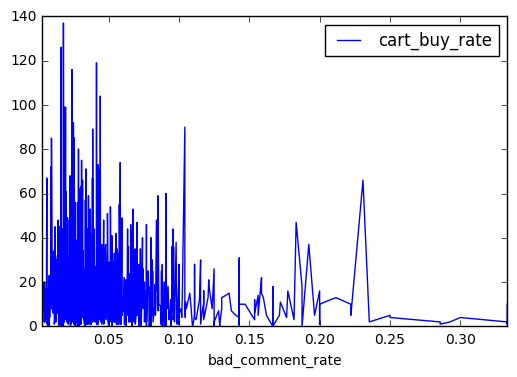

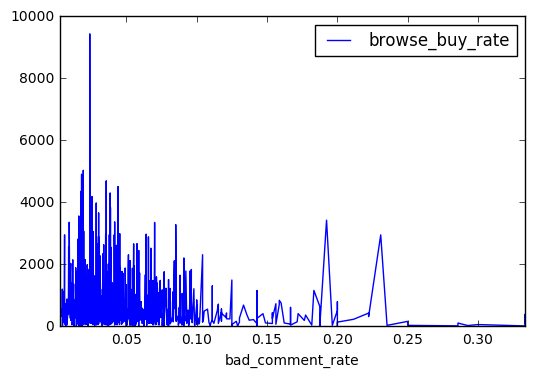

In [36]:
ggg.plot('bad_comment_rate','cart_buy_rate')
ggg.plot('bad_comment_rate','browse_buy_rate')
plt.show()

       bad_comment_rate  cart_buy_rate
count         40.000000      40.000000
mean           0.006488      14.075000
std            0.001941      18.760826
min            0.002800       0.000000
25%            0.004900       3.750000
50%            0.006600       8.500000
75%            0.007900      17.000000
max            0.009900      85.000000
Comment_num_1     0.0
Comment_num_2     0.0
Comment_num_3     0.0
Comment_num_4    40.0
dtype: float64
bad_comment_rate     0.021170
cart_buy_rate       20.821678
dtype: float64
Comment_num_1      0.0
Comment_num_2      0.0
Comment_num_3     31.0
Comment_num_4    255.0
dtype: float64
bad_comment_rate     0.029651
cart_buy_rate       19.814332
dtype: float64
Comment_num_1      0.0
Comment_num_2      0.0
Comment_num_3     48.0
Comment_num_4    259.0
dtype: float64
bad_comment_rate     0.039487
cart_buy_rate       18.310861
dtype: float64
Comment_num_1      0.0
Comment_num_2      0.0
Comment_num_3     57.0
Comment_num_4    210.0
dtype: float64


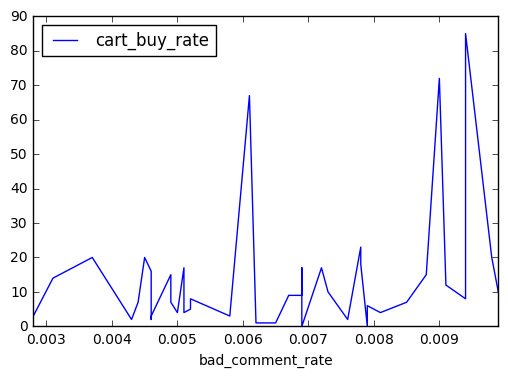

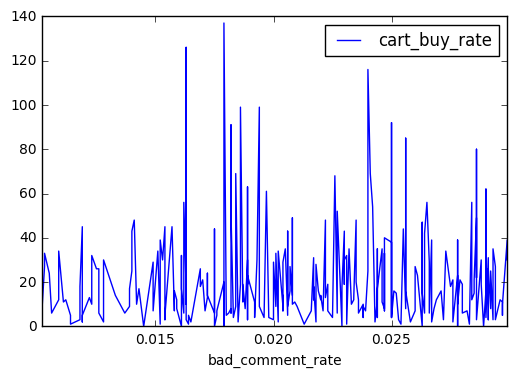

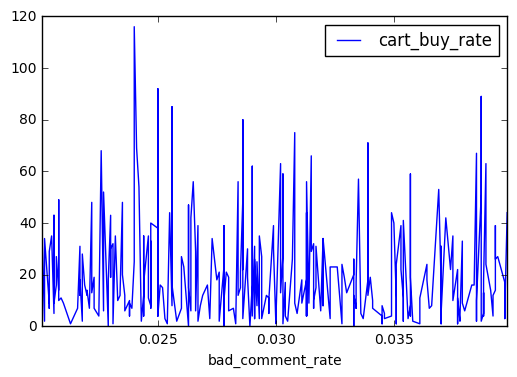

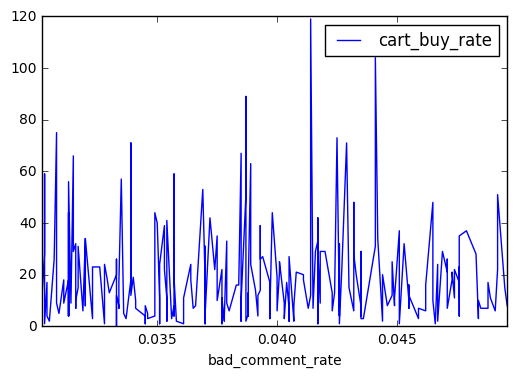

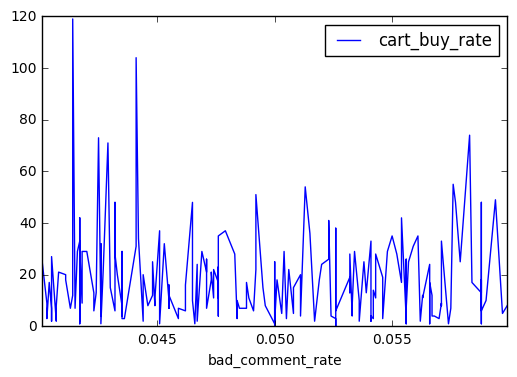

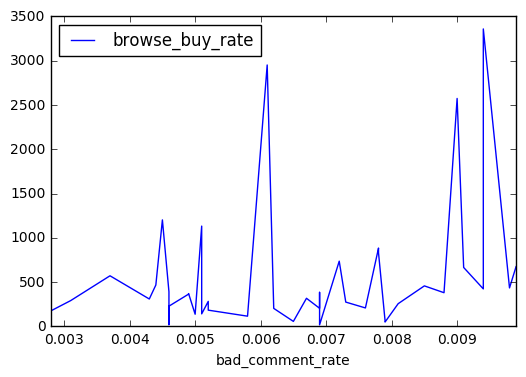

In [61]:
ccc = ggg[ggg.bad_comment_rate<0.01]
ddd = ggg[(ggg.bad_comment_rate>0.01)&(ggg.bad_comment_rate<0.03)]
eee = ggg[(ggg.bad_comment_rate>0.02)&(ggg.bad_comment_rate<0.04)]
fff = ggg[(ggg.bad_comment_rate>0.03)&(ggg.bad_comment_rate<0.05)]
kkk = ggg[(ggg.bad_comment_rate>0.04)&(ggg.bad_comment_rate<0.06)]
ccc.plot('bad_comment_rate','cart_buy_rate')
ddd.plot('bad_comment_rate','cart_buy_rate')
eee.plot('bad_comment_rate','cart_buy_rate')
fff.plot('bad_comment_rate','cart_buy_rate')
kkk.plot('bad_comment_rate','cart_buy_rate')
ccc.plot('bad_comment_rate','browse_buy_rate')
print(ccc[['bad_comment_rate','cart_buy_rate']].describe())
print(ccc[['Comment_num_1','Comment_num_2','Comment_num_3','Comment_num_4']].sum())
print(ddd[['bad_comment_rate','cart_buy_rate']].mean())
print(ddd[['Comment_num_1','Comment_num_2','Comment_num_3','Comment_num_4']].sum())
print(eee[['bad_comment_rate','cart_buy_rate']].mean())
print(eee[['Comment_num_1','Comment_num_2','Comment_num_3','Comment_num_4']].sum())
print(fff[['bad_comment_rate','cart_buy_rate']].mean())
print(fff[['Comment_num_1','Comment_num_2','Comment_num_3','Comment_num_4']].sum())
print(kkk[['bad_comment_rate','cart_buy_rate']].mean())
print(kkk[['Comment_num_1','Comment_num_2','Comment_num_3','Comment_num_4']].sum())
plt.show()

       bad_comment_rate  cart_buy_rate
count        473.000000     473.000000
mean           0.093947      13.063425
std            0.049665      12.683743
min            0.050100       0.000000
25%            0.062500       4.000000
50%            0.076900       9.000000
75%            0.108700      18.000000
max            0.333300      90.000000
Comment_num_1      0.0
Comment_num_2     53.0
Comment_num_3    157.0
Comment_num_4    263.0
dtype: float64
bad_comment_rate     0.059649
cart_buy_rate       14.968085
dtype: float64
Comment_num_1      0.0
Comment_num_2      0.0
Comment_num_3     50.0
Comment_num_4    138.0
dtype: float64
bad_comment_rate     0.069203
cart_buy_rate       13.079470
dtype: float64
Comment_num_1     0.0
Comment_num_2     0.0
Comment_num_3    54.0
Comment_num_4    97.0
dtype: float64
bad_comment_rate     0.078372
cart_buy_rate       13.584071
dtype: float64
Comment_num_1     0.0
Comment_num_2     0.0
Comment_num_3    41.0
Comment_num_4    72.0
dtype: float64
bad_

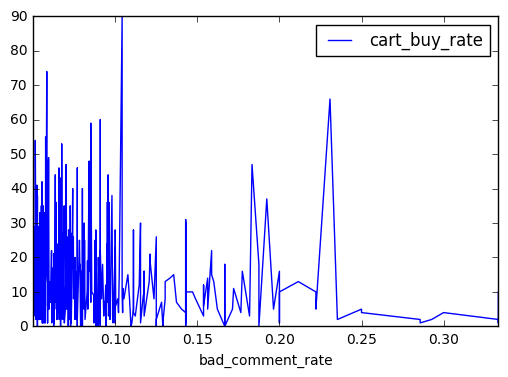

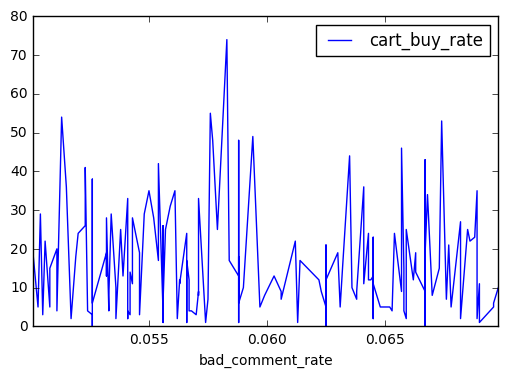

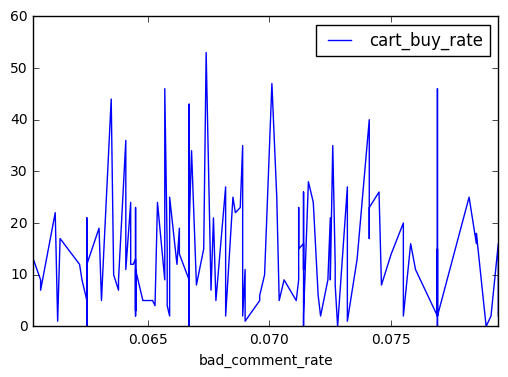

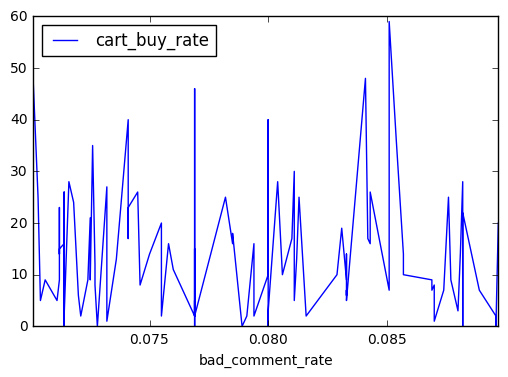

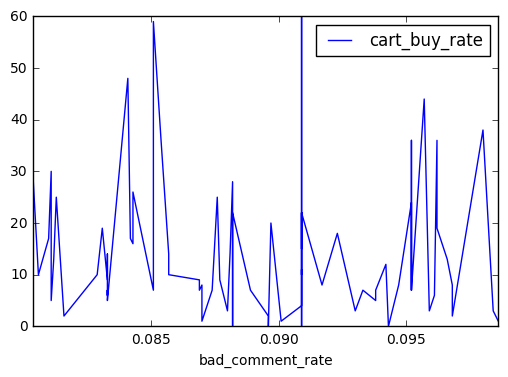

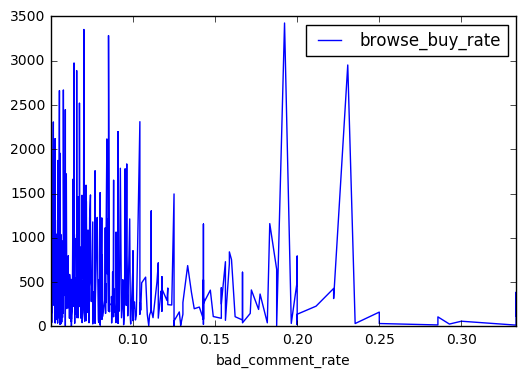

In [62]:
ccc = ggg[ggg.bad_comment_rate>0.05]
ddd = ggg[(ggg.bad_comment_rate>0.05)&(ggg.bad_comment_rate<0.07)]
eee = ggg[(ggg.bad_comment_rate>0.06)&(ggg.bad_comment_rate<0.08)]
fff = ggg[(ggg.bad_comment_rate>0.07)&(ggg.bad_comment_rate<0.09)]
kkk = ggg[(ggg.bad_comment_rate>0.08)&(ggg.bad_comment_rate<0.10)]
ccc.plot('bad_comment_rate','cart_buy_rate')
ddd.plot('bad_comment_rate','cart_buy_rate')
eee.plot('bad_comment_rate','cart_buy_rate')
fff.plot('bad_comment_rate','cart_buy_rate')
kkk.plot('bad_comment_rate','cart_buy_rate')
ccc.plot('bad_comment_rate','browse_buy_rate')
print(ccc[['bad_comment_rate','cart_buy_rate']].describe())
print(ccc[['Comment_num_1','Comment_num_2','Comment_num_3','Comment_num_4']].sum())
print(ddd[['bad_comment_rate','cart_buy_rate']].mean())
print(ddd[['Comment_num_1','Comment_num_2','Comment_num_3','Comment_num_4']].sum())
print(eee[['bad_comment_rate','cart_buy_rate']].mean())
print(eee[['Comment_num_1','Comment_num_2','Comment_num_3','Comment_num_4']].sum())
print(fff[['bad_comment_rate','cart_buy_rate']].mean())
print(fff[['Comment_num_1','Comment_num_2','Comment_num_3','Comment_num_4']].sum())
print(kkk[['bad_comment_rate','cart_buy_rate']].mean())
print(kkk[['Comment_num_1','Comment_num_2','Comment_num_3','Comment_num_4']].sum())
plt.show()

In [35]:
pianzi =ggg[ggg.bad_comment_rate<0.05]
pianzi[['Comment_num_1','Comment_num_2','Comment_num_3','Comment_num_4']].sum()

Comment_num_1      0.0
Comment_num_2      0.0
Comment_num_3     88.0
Comment_num_4    507.0
dtype: float64

In [37]:
pianzi2 =ggg[(ggg.bad_comment_rate>0.05)&(ggg.bad_comment_rate<0.10)]
pianzi2[['Comment_num_1','Comment_num_2','Comment_num_3','Comment_num_4']].sum()

Comment_num_1      0.0
Comment_num_2      0.0
Comment_num_3    104.0
Comment_num_4    231.0
dtype: float64

In [38]:
pianzi3 =ggg[(ggg.bad_comment_rate>0.10)&(ggg.bad_comment_rate<0.15)]
pianzi3[['Comment_num_1','Comment_num_2','Comment_num_3','Comment_num_4']].sum()

Comment_num_1     0.0
Comment_num_2    25.0
Comment_num_3    30.0
Comment_num_4    24.0
dtype: float64

In [39]:
pianzi4 =ggg[(ggg.bad_comment_rate>0.15)&(ggg.bad_comment_rate<0.20)]
pianzi4[['Comment_num_1','Comment_num_2','Comment_num_3','Comment_num_4']].sum()

Comment_num_1     0.0
Comment_num_2     5.0
Comment_num_3    15.0
Comment_num_4     7.0
dtype: float64

In [41]:
pianzi5 =ggg[(ggg.bad_comment_rate>0.25)&(ggg.bad_comment_rate<0.50)]
pianzi5[['Comment_num_1','Comment_num_2','Comment_num_3','Comment_num_4']].sum()

Comment_num_1    0.0
Comment_num_2    8.0
Comment_num_3    1.0
Comment_num_4    0.0
dtype: float64